In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import pymrmr
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
import timeit

from sklearn.svm import SVC
%matplotlib inline

### Dataset IoT e Não IoT

In [2]:
dfMac = pd.read_csv('Df_sem_filtro.csv') # Datasest mesclado com MAC IOT sem filtro
#dfMacFiltro = pd.read_csv('Df_com_filtro.csv') # Datasest mesclado com filtro MAC IOT
dfMac['Label'] = dfMac['isIoT']
dfMac.drop(['isIoT','Mac src','Mac dst','Flow ID','Src IP','Dst IP','Timestamp'], axis=1, inplace=True)

In [221]:
dfMac teste

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4425,49153,6,6434,3,4,196.0,193.0,196.0,0.0,...,32,0,0,0,0,1.474553e+15,1.846140e+03,1.474553e+15,1.474553e+15,1
1,4425,49153,6,1173,2,0,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2,4426,49153,6,6498,3,4,198.0,193.0,198.0,0.0,...,32,0,0,0,0,1.474553e+15,1.817797e+03,1.474553e+15,1.474553e+15,1
3,4426,49153,6,1217,2,0,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
4,4977,49152,6,9928,3,4,186.0,1170.0,186.0,0.0,...,32,0,0,0,0,1.474553e+15,2.305375e+03,1.474553e+15,1.474553e+15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642573,56733,53,17,20862,1,1,28.0,230.0,28.0,28.0,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
642574,38280,443,6,118,2,0,0.0,0.0,0.0,0.0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
642575,80,44315,6,1371,1,1,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
642576,4119,49153,6,3062,1,1,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1


### Dataset Ataque IoT - TCP - UDP

In [3]:
dfAtaque = pd.read_csv('Ataque_TCP_UDP.csv')

In [4]:
dfAtaque.drop(['Flow ID','Src IP','Dst IP','Timestamp'], axis=1, inplace=True)

In [224]:
dfAtaque

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,13143,80,6,19001461,7,3,400.0,0.0,100.0,0.0,...,20,0,0,0,0,1.528096e+15,6.839944e+06,1.528096e+15,1.528096e+15,0
1,38416,80,6,18131541,5,1,400.0,0.0,100.0,0.0,...,20,0,0,0,0,1.528096e+15,5.832977e+06,1.528096e+15,1.528096e+15,0
2,19170,80,6,20046812,4,0,400.0,0.0,100.0,100.0,...,20,0,0,0,0,1.018730e+15,8.822465e+14,1.528096e+15,1.011041e+07,0
3,20744,80,6,16962922,4,1,300.0,0.0,100.0,0.0,...,20,0,0,0,0,1.528096e+15,5.680127e+06,1.528096e+15,1.528096e+15,0
4,24821,80,6,18861764,4,0,400.0,0.0,100.0,100.0,...,20,0,0,0,0,1.018730e+15,8.822465e+14,1.528096e+15,9.897761e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2621193,57422,80,17,16558957,10,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,4.580390e+06,1.528099e+15,1.528099e+15,0
2621194,41638,80,17,17156713,12,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,4.761391e+06,1.528099e+15,1.528099e+15,0
2621195,31386,80,17,15021921,10,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,3.933850e+06,1.528099e+15,1.528099e+15,0
2621196,62251,80,17,15822822,12,0,0.0,0.0,0.0,0.0,...,8,0,0,0,0,1.528099e+15,4.356130e+06,1.528099e+15,1.528099e+15,0


### Redução/Mesclagem do dataset

In [5]:
# drf = Dataset IoT e Não IoT
# drf1 = Datasset Ataque IoT
# dfMesclado = 
def dfOriginal(dataset,amostras):
    
    if dataset == 'mac':
        print(f'Dataset IoT Selecionado com {amostras} amostras')
        dfr = dfMac[:amostras]
    elif dataset == 'ataque':
        print(f'Dataset Ataque Selecionado com {amostras} amostras')
        dfr = dfAtaque[:amostras]
    elif dataset == 'mesclado':
        print(f'Dataset ATAQUE Selecionado com {amostras*2} amostras')
        dfr = dfMac[dfMac['Label']==1]
        dfr = pd.concat([dfr[:amostras],dfAtaque[:amostras]], ignore_index=True, axis=0)
    else:
        print('Opção não existente')
       
        
    return dfr

In [6]:
# 'mac' => Dataet IOT
# 'ataque' => Dataet Ataque
# 'mesclado' => Dataet Mesclado
dfr = dfOriginal('mesclado',5000)

Dataset ATAQUE Selecionado com 10000 amostras


In [7]:
dfMac

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4425,49153,6,6434,3,4,196.0,193.0,196.0,0.0,...,32,0,0,0,0,1.474553e+15,1.846140e+03,1.474553e+15,1.474553e+15,1
1,4425,49153,6,1173,2,0,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2,4426,49153,6,6498,3,4,198.0,193.0,198.0,0.0,...,32,0,0,0,0,1.474553e+15,1.817797e+03,1.474553e+15,1.474553e+15,1
3,4426,49153,6,1217,2,0,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
4,4977,49152,6,9928,3,4,186.0,1170.0,186.0,0.0,...,32,0,0,0,0,1.474553e+15,2.305375e+03,1.474553e+15,1.474553e+15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642573,56733,53,17,20862,1,1,28.0,230.0,28.0,28.0,...,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
642574,38280,443,6,118,2,0,0.0,0.0,0.0,0.0,...,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0
642575,80,44315,6,1371,1,1,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
642576,4119,49153,6,3062,1,1,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1


## Seleção de características

## Removendo recursos com baixa variância 
#### Fase 01 - Remove todos os recursos cuja variação não atinge algum limite determinado. Por padrão, ele remove todos os recursos de variação zero, ou seja, os **recursos que têm o mesmo valor em todas as amostras.

Limite estabelecido 80% das amostras.

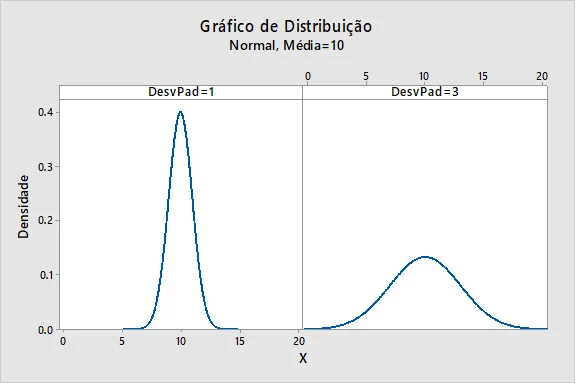

In [11]:
from IPython.display import Image
Image(filename ="normal.png", width=500, height=500)

In [8]:
def baixaVariancia(dados1,porc, norm=False):
    from sklearn.feature_selection import VarianceThreshold
    
    df = dados1
    if norm == True:
        min_max_scaler = MinMaxScaler()
        df = min_max_scaler.fit_transform(df)
    
        
    sel = VarianceThreshold(threshold=((porc/100) * (1 - (porc/100))))
    dfMacS = sel.fit_transform(df)
    ind = sel.get_support()
    colS = dados1.columns[ind]
    dfMacS = pd.DataFrame(dfMacS, columns=colS)
    dfMacS['Label'] = dados1['Label']
    #sh = dfMac.shape
    return dfMacS

In [346]:
df_bv = baixaVariancia(dfr,80,False)
print(df_bv)
#print(sh_bv)

      Src Port  Dst Port  Protocol  Flow Duration  Total Fwd Packet  \
0       4425.0   49153.0       6.0         6434.0               3.0   
1       4425.0   49153.0       6.0         1173.0               2.0   
2       4426.0   49153.0       6.0         6498.0               3.0   
3       4426.0   49153.0       6.0         1217.0               2.0   
4       4977.0   49152.0       6.0         9928.0               3.0   
...        ...       ...       ...            ...               ...   
9995    2602.0      80.0       6.0     23147171.0               6.0   
9996   33388.0      80.0       6.0     19317524.0               5.0   
9997   17380.0      80.0       6.0     20253253.0               5.0   
9998   47441.0      80.0       6.0     14069570.0               3.0   
9999   41450.0      80.0       6.0     18655935.0               5.0   

      Total Bwd packets  Total Length of Fwd Packet  \
0                   4.0                       196.0   
1                   0.0              

In [229]:
baixaVariancia(dfr,80,False)

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4425.0,49153.0,6.0,6434.0,3.0,4.0,196.0,193.0,196.0,0.0,...,27.0,5840.0,2896.0,1.0,32.0,1.474553e+15,1.846140e+03,1.474553e+15,1.474553e+15,1
1,4425.0,49153.0,6.0,1173.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2920.0,0.0,0.0,32.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2,4426.0,49153.0,6.0,6498.0,3.0,4.0,198.0,193.0,198.0,0.0,...,27.0,5840.0,2896.0,1.0,32.0,1.474553e+15,1.817797e+03,1.474553e+15,1.474553e+15,1
3,4426.0,49153.0,6.0,1217.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2920.0,0.0,0.0,32.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
4,4977.0,49152.0,6.0,9928.0,3.0,4.0,186.0,1170.0,186.0,0.0,...,167.0,5840.0,1716.0,1.0,32.0,1.474553e+15,2.305375e+03,1.474553e+15,1.474553e+15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2602.0,80.0,6.0,23147171.0,6.0,1.0,500.0,0.0,100.0,0.0,...,0.0,512.0,29200.0,4.0,20.0,1.528096e+15,7.119537e+06,1.528096e+15,1.528096e+15,0
9996,33388.0,80.0,6.0,19317524.0,5.0,1.0,400.0,0.0,100.0,0.0,...,0.0,512.0,29200.0,3.0,20.0,1.528096e+15,6.090066e+06,1.528096e+15,1.528096e+15,0
9997,17380.0,80.0,6.0,20253253.0,5.0,1.0,400.0,0.0,100.0,0.0,...,0.0,512.0,29200.0,3.0,20.0,1.222477e+15,6.833852e+14,1.528096e+15,1.003906e+07,0
9998,47441.0,80.0,6.0,14069570.0,3.0,0.0,300.0,0.0,100.0,100.0,...,0.0,512.0,0.0,2.0,20.0,7.640479e+14,1.080527e+15,1.528096e+15,9.232680e+06,0


## Seleção de recurso 

### SelectFromMode - é um meta-transformador que pode ser usado junto com qualquer estimador que possua um coef_ou feature_importances_atributo após o ajuste.
### Meta-transformador para selecionar recursos com base em pesos importantes

### Fase 02

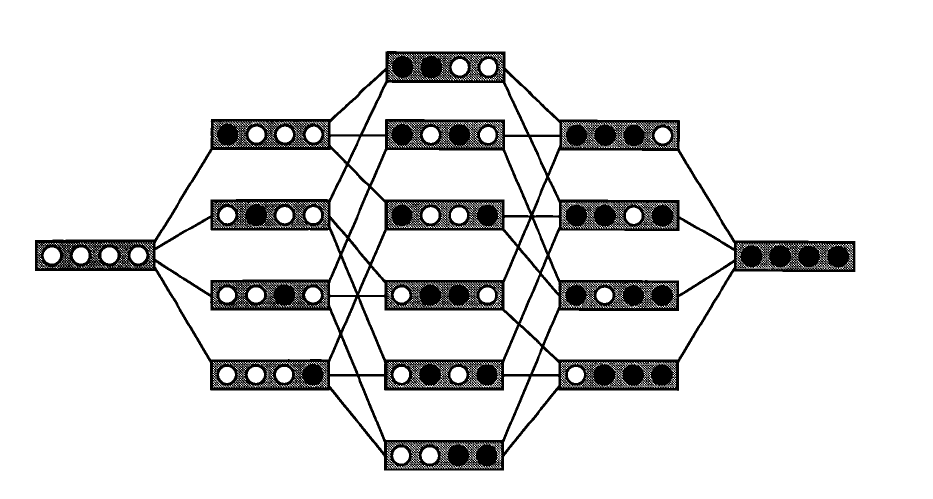

In [15]:
from IPython.display import Image
Image(filename ="select.png", width=900, height=900)

In [9]:
def svmSel(dados,norm=False):
    from sklearn.svm import LinearSVC
    from sklearn.feature_selection import SelectFromModel
    #dados = baixaVariancia(dados,90, norm)
    X = dados.drop('Label', axis=1)
    y = dados['Label']
    
    if norm == True:
        min_max_scaler = MinMaxScaler()
        X = min_max_scaler.fit_transform(X)
    
    lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(X, y)
    
    model = SelectFromModel(lsvc, prefit=True)
    X_new = model.transform(X)
    X11 = model.get_support(indices=True)
    col2 = dados.columns[X11]
    dfMac = pd.DataFrame(X_new, columns=col2)
    dfMac['Label'] = dados['Label']
    sh = dfMac.shape
    return dfMac, sh

In [231]:
bV = baixaVariancia(dfr,90,False)
svmSel(bV,norm=False)


(      Dst Port  Total Fwd Packet  Total Length of Fwd Packet  \
 0      49153.0               3.0                       196.0   
 1      49153.0               2.0                         0.0   
 2      49153.0               3.0                       198.0   
 3      49153.0               2.0                         0.0   
 4      49152.0               3.0                       186.0   
 ...        ...               ...                         ...   
 9995      80.0               6.0                       500.0   
 9996      80.0               5.0                       400.0   
 9997      80.0               5.0                       400.0   
 9998      80.0               3.0                       300.0   
 9999      80.0               5.0                       400.0   
 
       Total Length of Bwd Packet  Fwd Packet Length Max  \
 0                          193.0                  196.0   
 1                            0.0                    0.0   
 2                          193.0     

## Seleção de recurso baseado em árvore

In [10]:
def selectArvore(dados,norm=False):
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.feature_selection import SelectFromModel
    #dados = baixaVariancia(dados,90, norm)
     
    X = dados.drop('Label', axis=1)
    y = dados['Label']
    
    if norm == True:
        min_max_scaler = MinMaxScaler()
        X = min_max_scaler.fit_transform(X)
   
    
    clf = ExtraTreesClassifier(n_estimators=50)
    clf = clf.fit(X, y)
    clf.feature_importances_  
    model = SelectFromModel(clf, prefit=True)
    X_new = model.transform(X)
    ind = model.get_support(indices=True)
    col = dados.columns[ind]
    dfMac = pd.DataFrame(X_new, columns=col)
    dfMac['Label'] = dados['Label']
    sh = dfMac.shape
    return dfMac, sh

In [233]:
bV = baixaVariancia(dfr,90,False)
svmSel(bV,norm=False)
bV = baixaVariancia(dfr,90,False)
selectArvore(bV,norm=False)

(      Dst Port  Protocol  Flow Duration  Fwd Packet Length Mean  \
 0      49153.0       6.0         6434.0               65.333333   
 1      49153.0       6.0         1173.0                0.000000   
 2      49153.0       6.0         6498.0               66.000000   
 3      49153.0       6.0         1217.0                0.000000   
 4      49152.0       6.0         9928.0               62.000000   
 ...        ...       ...            ...                     ...   
 9995      80.0       6.0     23147171.0               83.333333   
 9996      80.0       6.0     19317524.0               80.000000   
 9997      80.0       6.0     20253253.0               80.000000   
 9998      80.0       6.0     14069570.0              100.000000   
 9999      80.0       6.0     18655935.0               80.000000   
 
       Flow IAT Mean  Flow IAT Std  Flow IAT Max  Fwd IAT Total  Fwd IAT Max  \
 0      1.072333e+03  8.766846e+02        2193.0         2589.0       2507.0   
 1      1.173000e+03  

### Seleção de recursos usando SelectFromModel e LassoCV 

In [11]:
def SelecLasso(dados,norm=False):
    import warnings
    warnings.filterwarnings("ignore")
   
    dfr = baixaVariancia(dados,90,norm)
    y = dfr['Label']
    X = dfr.drop('Label',axis=1)
    
     
    feature_names = X.columns

    if norm == True:
        min_max_scaler = MinMaxScaler()
        X = min_max_scaler.fit_transform(X)

    clf = LassoCV().fit(X, y)
    importance = np.abs(clf.coef_)

    idx_third = importance.argsort()[-7]
    threshold = importance[idx_third]

    idx_features = (-importance).argsort()[:30]
    name_features = np.array(feature_names)[idx_features]
    #print('Selected features: {}'.format(name_features))


    sfm = SelectFromModel(clf, threshold=threshold)
    sfm.fit(X, y)
    X_transform = sfm.transform(X)
    ind = sfm.get_support(indices=True)
    col = dfr.columns[ind]
    DFTd = pd.DataFrame(X_transform, columns=col)
    DFTd['Label'] = dados['Label']
    sh = DFTd.shape
    return DFTd, sh

In [235]:
dd1, dd2 = SelecLasso(bV,False)
#svmSel(bV,norm=False)
#bV = baixaVariancia(dfr,90,False)
#selectArvore(bV,norm=False)
#bV = baixaVariancia(dfr,90,False)
#a, b = SelecLasso(bV,norm=True)

In [236]:
dd2

(10000, 64)

# Algorítimos Supervisionados


## KNN

### Teste cotuvelo - Definição do número de K-Vizinhos mais próximos

In [24]:
#plt.figure(figsize=(10,6))
#plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
#plt.title('Error Rate vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Error Rate')

### KNN

In [241]:
def knn(dados,norm=False):
    X = dados.drop('Label', axis=1)
    y = dados['Label']
    
    
    
    if norm == True:
        min_max_scaler = MinMaxScaler()
        X = min_max_scaler.fit_transform(X)
        
    iniTrei = timeit.default_timer()
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state = 101)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    fimTrei = timeit.default_timer()
    
    iniPred = timeit.default_timer()
    scoreknn = knn.score(X_test,y_test)
    fimPred = timeit.default_timer()
    
    temTrei = ('Treino ', fimTrei - iniTrei)
    temPred = ('Predição ', fimPred - iniPred)
    return scoreknn*100, temTrei, temPred

In [29]:
# KNN

In [244]:
df_bv = baixaVariancia(dfr,90,False)
df_svm, sh_svm = svmSel(df_bv,norm=False)
df_arv, sh_arv = selectArvore(df_bv,norm=False)
df_las, sh_las = SelecLasso(df_bv,norm=True)
print('Dataset com todo as características')
print('original ',knn(dfr,norm=False))
print('Dataset com seleção de características')
print('True')
print('bv knn ',knn(df_bv,norm=True))
print(df_bv.shape)
print('svm knn ',knn(df_svm,norm=True))
print(sh_svm)
print('arv knn ',knn(df_arv,norm=True))
print(sh_arv)
print('las knn ',knn(df_las,norm=True))
print(sh_las)

Dataset com todo as características
original  (87.39333333333333, ('Treino ', 4.343452799999795), ('Predição ', 2.7147022999997716))
Dataset com seleção de características
True
bv knn  (99.13, ('Treino ', 3.9986554000024626), ('Predição ', 10.484300000000076))
(100000, 64)
svm knn  (99.3, ('Treino ', 7.727771000001667), ('Predição ', 9.543353100001696))
(100000, 40)
arv knn  (99.02666666666666, ('Treino ', 1.9442622999995365), ('Predição ', 4.647632100000919))
(100000, 25)
las knn  (96.31333333333333, ('Treino ', 0.5768731999996817), ('Predição ', 1.32105799999772))
(100000, 8)


In [282]:
rank5 = dfr[ranqueado_ben[:5]][:100000]
rank5['Label'] = dfr['Label'][:100000]
rank10 = dfr[ranqueado_ben[:10]][:100000]
rank10['Label'] = dfr['Label'][:100000]
rank20 = dfr[ranqueado_ben[:20]][:100000]
rank20['Label'] = dfr['Label'][:100000]
rank30 = dfr[ranqueado_ben[:30]][:100000]
rank30['Label'] = dfr['Label'][:100000]
rank40 = dfr[ranqueado_ben[:40]][:100000]
rank40['Label'] = dfr['Label'][:100000]

In [283]:
print('Dataset com seleção de características')
print('mrmr 5 ',knn(rank5,norm=False))
print('mrmr 10 ',knn(rank10,norm=False))
print('mrmr 20 ',knn(rank20,norm=False))
print('mrmr 30 ',knn(rank30,norm=False))
print('mrmr 40 ',knn(rank40,norm=False))

Dataset com seleção de características
mrmr 5  (94.16666666666667, ('Treino ', 1.4612676000106148), ('Predição ', 3.523304999995162))
mrmr 10  (96.51666666666667, ('Treino ', 1.6668624000012642), ('Predição ', 3.3528790999989724))
mrmr 20  (98.88666666666667, ('Treino ', 1.1667931999982102), ('Predição ', 2.689497300001676))
mrmr 30  (88.15333333333332, ('Treino ', 1.710900700010825), ('Predição ', 1.9181894999928772))
mrmr 40  (87.51333333333334, ('Treino ', 2.123906499997247), ('Predição ', 2.0655538999999408))


### REGRESSÃO LOGÍSTICA

In [246]:
def regressaoLogistica(dados,norm=False):
    X = dados.drop('Label', axis=1)
    y = dados['Label']
    
    if norm == True:
        min_max_scaler = MinMaxScaler()
        X = min_max_scaler.fit_transform(X)
    iniTrei = timeit.default_timer()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    fimTrei = timeit.default_timer()
    
    iniPred = timeit.default_timer()
    scoreRL = logmodel.score(X_test,y_test)
    fimPred = timeit.default_timer()
    
    temTrei = ('Treino ', fimTrei - iniTrei)
    temPred = ('Predição ', fimPred - iniPred)
    
    return scoreRL*100, temTrei, temPred

In [247]:
df_bv = baixaVariancia(dfr,90,False)
df_svm, sh_svm = svmSel(df_bv,norm=False)
df_arv, sh_arv = selectArvore(df_bv,norm=False)
df_las, sh_las = SelecLasso(df_bv,norm=True)

print('Dataset com todo as características')
print('original ',regressaoLogistica(dfr,norm=False))
print('Dataset com seleção de características')
print('True')
print('bv rl ',regressaoLogistica(df_bv,norm=True))
print(df_bv.shape)
print('svc rl ',regressaoLogistica(df_svm,norm=True))
print(sh_svm)
print('arv rl ',regressaoLogistica(df_arv,norm=True))
print(sh_arv)
print('las rl ',regressaoLogistica(df_las,norm=True))
print(sh_las)

Dataset com todo as características
original  (15.621212121212121, ('Treino ', 0.5696272000022873), ('Predição ', 0.022510200000397163))
Dataset com seleção de características
True
bv rl  (89.21515151515152, ('Treino ', 1.5685424000002968), ('Predição ', 0.007419300000037765))
(100000, 64)
svc rl  (86.29393939393938, ('Treino ', 1.2978617999979178), ('Predição ', 0.005580199998803437))
(100000, 38)
arv rl  (87.75757575757575, ('Treino ', 1.0001773000003595), ('Predição ', 0.004792600000655511))
(100000, 26)
las rl  (84.9909090909091, ('Treino ', 0.1465371000012965), ('Predição ', 0.00258889999895473))
(100000, 8)


In [284]:
print('Dataset com seleção de características')
print('mrmr 5 ',regressaoLogistica(rank5,norm=False))
print('mrmr 10 ',regressaoLogistica(rank10,norm=False))
print('mrmr 20 ',regressaoLogistica(rank20,norm=False))
print('mrmr 30 ',regressaoLogistica(rank30,norm=False))
print('mrmr 40 ',regressaoLogistica(rank40,norm=False))

Dataset com seleção de características
mrmr 5  (84.37878787878788, ('Treino ', 0.6038800000096671), ('Predição ', 0.004309499985538423))
mrmr 10  (85.91212121212122, ('Treino ', 0.6906220999953803), ('Predição ', 0.006686400010949001))
mrmr 20  (85.83030303030303, ('Treino ', 1.1897266000014497), ('Predição ', 0.009434299994609319))
mrmr 30  (15.621212121212121, ('Treino ', 0.317741599996225), ('Predição ', 0.009468999996897765))
mrmr 40  (15.621212121212121, ('Treino ', 0.3959115000034217), ('Predição ', 0.012350500008324161))


## Naive Bayes

In [248]:
def naiveBayes(dados,norm=False):
    X = dados.drop('Label', axis=1)
    y = dados['Label']

    model = GaussianNB(var_smoothing=1e-02)
    
    if norm == True:
        min_max_scaler = MinMaxScaler()
        X = min_max_scaler.fit_transform(X)
    
    iniTrei = timeit.default_timer()
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)
    model.fit(xTrain, yTrain)
    fimTrei = timeit.default_timer()
    #predNB = model.predict(xTest)
    iniPred = timeit.default_timer()
    scoreNB = model.score(xTest,yTest)
    fimPred = timeit.default_timer()
    
    temTrei = ('Treino ', fimTrei - iniTrei)
    temPred = ('Predição ', fimPred - iniPred)
    
    return scoreNB*100, temTrei, temPred
    

In [249]:
df_bv = baixaVariancia(dfr,90,False)
df_svm, sh_svm = svmSel(df_bv,norm=False)
df_arv, sh_arv = selectArvore(df_bv,norm=False)
df_las, sh_las = SelecLasso(df_bv,norm=True)

print('Dataset com todo as características')
print('nb orignal',naiveBayes(dfr,norm=False))

print('Dataset com seleção de características')
print('True')
print('bv nb ',naiveBayes(df_bv,norm=True))
print(df_bv.shape)
print('svc nb ',naiveBayes(df_svm,norm=True))
print(sh_svm)
print('arv nb ',naiveBayes(df_arv,norm=True))
print(sh_arv)
print('las nb ',naiveBayes(df_las,norm=True))
print(sh_las)


Dataset com todo as características
nb orignal (80.66333333333333, ('Treino ', 0.46023110000169254), ('Predição ', 0.10238630000094417))
Dataset com seleção de características
True
bv nb  (78.19333333333334, ('Treino ', 0.24330680000275606), ('Predição ', 0.06758350000018254))
(100000, 64)
svc nb  (78.4, ('Treino ', 0.17600680000032298), ('Predição ', 0.05408569999781321))
(100000, 40)
arv nb  (80.31666666666666, ('Treino ', 0.11807549999866751), ('Predição ', 0.031839100000070175))
(100000, 27)
las nb  (83.81333333333333, ('Treino ', 0.06789320000098087), ('Predição ', 0.010882599999604281))
(100000, 8)


In [285]:
print('Dataset com seleção de características')
print('mrmr 5 ',naiveBayes(rank5,norm=False))
print('mrmr 10 ',naiveBayes(rank10,norm=False))
print('mrmr 20 ',naiveBayes(rank20,norm=False))
print('mrmr 30 ',naiveBayes(rank30,norm=False))
print('mrmr 40 ',naiveBayes(rank40,norm=False))

Dataset com seleção de características
mrmr 5  (83.75333333333333, ('Treino ', 0.2692772000009427), ('Predição ', 0.007985000003827736))
mrmr 10  (85.81333333333333, ('Treino ', 0.06820130000414792), ('Predição ', 0.013437599991448224))
mrmr 20  (85.86666666666667, ('Treino ', 0.10162590000254568), ('Predição ', 0.02915299999585841))
mrmr 30  (83.95, ('Treino ', 0.1292548000055831), ('Predição ', 0.036845299997366965))
mrmr 40  (83.96000000000001, ('Treino ', 0.18265539999993052), ('Predição ', 0.05446640000445768))


### Árvore de decisão

In [251]:
def arvoreDecisao(dados,norm=False):
    X = dados.drop('Label', axis=1)
    y = dados['Label']

    if norm == True:
        min_max_scaler = MinMaxScaler()
        X = min_max_scaler.fit_transform(X)
        
    iniTrei = timeit.default_timer()
    dtree = DecisionTreeClassifier()
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)
    dtree.fit(xTrain, yTrain)
    fimTrei = timeit.default_timer()
    #predAD = dtree.predict(xTest)
    
    iniPred = timeit.default_timer()
    scoreADT = dtree.score(xTest,yTest)
    fimPred = timeit.default_timer()
    
    temTrei = ('Treino ', fimTrei - iniTrei)
    temPred = ('Predição ', fimPred - iniPred)
    return scoreADT*100, temTrei, temPred

In [252]:
df_bv = baixaVariancia(dfr,90,True)
df_svm, sh_svm = svmSel(df_bv,norm=True)
df_arv, sh_arv = selectArvore(df_bv,norm=True)
df_las, sh_las = SelecLasso(df_bv,norm=True)

print('Dataset com todo as características')
print(arvoreDecisao(dfr,norm=False))

print('Dataset com seleção de características')
print('True')
print('bv ad ',arvoreDecisao(df_bv,norm=True))
print(df_bv.shape)
print('svc ad ',arvoreDecisao(df_svm,norm=True))
print(sh_svm)
print('arv ad ',arvoreDecisao(df_arv,norm=True))
print(sh_arv)
print('las ad ',arvoreDecisao(df_las,norm=True))
print(sh_las)

Dataset com todo as características
(99.28333333333333, ('Treino ', 2.9871130999999878), ('Predição ', 0.027058800002123462))
Dataset com seleção de características
True
bv ad  (98.87, ('Treino ', 0.47514009999940754), ('Predição ', 0.005722500001866138))
(100000, 13)
svc ad  (98.82, ('Treino ', 0.43907469999976456), ('Predição ', 0.007469999996828847))
(100000, 12)
arv ad  (98.27666666666667, ('Treino ', 0.24646620000203256), ('Predição ', 0.004874400001426693))
(100000, 6)
las ad  (97.07000000000001, ('Treino ', 0.29054460000043036), ('Predição ', 0.006326499998976942))
(100000, 8)


In [286]:
print('Dataset com seleção de características')
print('mrmr 5 ',arvoreDecisao(rank5,norm=False))
print('mrmr 10 ',arvoreDecisao(rank10,norm=False))
print('mrmr 20 ',arvoreDecisao(rank20,norm=False))
print('mrmr 30 ',arvoreDecisao(rank30,norm=False))
print('mrmr 40 ',arvoreDecisao(rank40,norm=False))

Dataset com seleção de características
mrmr 5  (94.75333333333333, ('Treino ', 0.4034706999955233), ('Predição ', 0.005441300003440119))
mrmr 10  (98.16333333333334, ('Treino ', 0.1424198000022443), ('Predição ', 0.007564499988802709))
mrmr 20  (99.32, ('Treino ', 0.370370799995726), ('Predição ', 0.011330500012263656))
mrmr 30  (99.39333333333333, ('Treino ', 0.7775359000079334), ('Predição ', 0.012622500013094395))
mrmr 40  (99.23666666666666, ('Treino ', 1.343464399993536), ('Predição ', 0.016889499995158985))


### Floresta Aleatória

In [253]:
def florestaAleatoria(dados,norm=False):
    X = dados.drop('Label', axis=1)
    y = dados['Label']
    
    
    if norm == True:
        min_max_scaler = MinMaxScaler()
        X = min_max_scaler.fit_transform(X)
    iniTrei = timeit.default_timer()
    rfc = RandomForestClassifier(n_estimators=100)
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)
    rfc.fit(xTrain, yTrain)
    fimTrei = timeit.default_timer()
    
    iniPred = timeit.default_timer()
    scoreFAT = rfc.score(xTest,yTest)
    #predFA = rfc.predict(xTest) 
    fimPred = timeit.default_timer()
    
    
    temTrei = ('Treino ', fimTrei - iniTrei)
    temPred = ('Predição ', fimPred - iniPred)
    return scoreFAT*100, temTrei, temPred

In [254]:
df_bv = baixaVariancia(dfr,90,False)
df_svm, sh_svm = svmSel(df_bv,norm=False)
df_arv, sh_arv = selectArvore(df_bv,norm=False)
df_las, sh_las = SelecLasso(df_bv,norm=True)

print('Dataset com todo as características')
print('original fa ',florestaAleatoria(dfr,norm=False))
 
print('Dataset com seleção de características')

print('True')
print('original fa ',florestaAleatoria(df_bv,norm=True))
print(df_bv.shape)
print('svc fa ',florestaAleatoria(df_svm,norm=True))
print(sh_svm)
print('arv fa ',florestaAleatoria(df_arv,norm=True))
print(sh_arv)
print('las fa ',florestaAleatoria(df_las,norm=True))
print(sh_las)

Dataset com todo as características
original fa  (99.56333333333333, ('Treino ', 17.673268099999405), ('Predição ', 0.4750588999995671))
Dataset com seleção de características
True
original fa  (99.54666666666667, ('Treino ', 18.555114399998274), ('Predição ', 0.3935654000015347))
(100000, 64)
svc fa  (99.41, ('Treino ', 10.280378599996766), ('Predição ', 0.38385489999927813))
(100000, 39)
arv fa  (99.63666666666666, ('Treino ', 14.70570840000073), ('Predição ', 0.3813711999973748))
(100000, 26)
las fa  (97.31, ('Treino ', 6.749450999999681), ('Predição ', 0.43094339999879594))
(100000, 8)


In [287]:
print('Dataset com seleção de características')
print('mrmr 5 ',florestaAleatoria(rank5,norm=False))
print('mrmr 10 ',florestaAleatoria(rank10,norm=False))
print('mrmr 20 ',florestaAleatoria(rank20,norm=False))
print('mrmr 30 ',florestaAleatoria(rank30,norm=False))
print('mrmr 40 ',florestaAleatoria(rank40,norm=False))

Dataset com seleção de características
mrmr 5  (94.93666666666667, ('Treino ', 2.0133914000034565), ('Predição ', 0.354695800007903))
mrmr 10  (98.04333333333334, ('Treino ', 3.2605643999995664), ('Predição ', 0.36022220000450034))
mrmr 20  (99.41, ('Treino ', 6.141193399991607), ('Predição ', 0.4012209000065923))
mrmr 30  (99.54333333333332, ('Treino ', 9.396622100000968), ('Predição ', 0.40904569999838714))
mrmr 40  (99.52666666666666, ('Treino ', 13.83751630000188), ('Predição ', 0.4394863999914378))


### SVM 

In [255]:
def svm(dados,norm=False):
    X = dados.drop('Label', axis=1)
    y = dados['Label']

    if norm == True:
        min_max_scaler = MinMaxScaler()
        X = min_max_scaler.fit_transform(X)
        
    iniTrei = timeit.default_timer()
    svc_model = SVC()
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

    svc_model.fit(xTrain, yTrain)
    fimTrei = timeit.default_timer()
    
    iniPred = timeit.default_timer()
    predSVM = svc_model.score(xTest,yTest)
    #predSVM = svc_model.predict(xTest)
    fimPred = timeit.default_timer()
    
    temTrei = ('Treino ', fimTrei - iniTrei)
    temPred = ('Predição ', fimPred - iniPred)
    
    return predSVM*100, temTrei, temPred

In [256]:
df_bv = baixaVariancia(dfr,90,False)
df_svm, sh_svm = svmSel(df_bv,norm=False)
df_arv, sh_arv = selectArvore(df_bv,norm=False)
df_las, sh_las = SelecLasso(df_bv,norm=True)

print('Dataset com todo as características')
print('original svm ',svm(dfr,norm=False))
print('Dataset com seleção de características')
print('True')
print('bv svm ',svm(df_bv,norm=True))
print(df_bv.shape)
print('svc svm ',svm(df_svm,norm=True))
print(sh_svm)
print('arv svm ',svm(df_arv,norm=True))
print(sh_arv)
print('las svm ',svm(df_las,norm=True))
print(sh_las)

Dataset com todo as características
original svm  (84.83666666666667, ('Treino ', 750.0124748000017), ('Predição ', 73.45086739999897))
Dataset com seleção de características
True
bv svm  (94.72333333333334, ('Treino ', 136.51731680000012), ('Predição ', 29.58440790000168))
(100000, 64)
svc svm  (92.04, ('Treino ', 429.3620577999973), ('Predição ', 22.655333899998368))
(100000, 38)
arv svm  (95.20333333333333, ('Treino ', 73.9402310000005), ('Predição ', 14.84961679999833))
(100000, 28)
las svm  (87.48666666666666, ('Treino ', 149.0834395999991), ('Predição ', 10.888454899999488))
(100000, 8)


In [288]:
print('Dataset com seleção de características')
print('mrmr 5 ',svm(rank5,norm=False))
print('mrmr 10 ',svm(rank10,norm=False))
print('mrmr 20 ',svm(rank20,norm=False))
print('mrmr 30 ',svm(rank30,norm=False))
print('mrmr 40 ',svm(rank40,norm=False))

Dataset com seleção de características
mrmr 5  (85.67, ('Treino ', 71.38818409999658), ('Predição ', 11.194584900003974))
mrmr 10  (85.63, ('Treino ', 122.24693209999532), ('Predição ', 13.226143299994874))
mrmr 20  (86.42666666666666, ('Treino ', 315.2436433999974), ('Predição ', 18.483131599990884))
mrmr 30  (84.99, ('Treino ', 249.20817850000458), ('Predição ', 29.97307870000077))
mrmr 40  (84.76333333333334, ('Treino ', 331.77435599999444), ('Predição ', 37.55228720000014))


In [20]:
def grafico(classGrafic, norClas=False, norSetor=False):
    acuraciaFF = []
    caracteristicas = []
    for ML in classGrafic:
        df_bv = baixaVariancia(dfr,90,norSetor)
        df_svm, sh_svm = svmSel(dfr,norm=norSetor)
        df_arv, sh_arv = selectArvore(dfr,norm=norSetor)
        df_las, sh_las = SelecLasso(dfr,norm=norSetor)
        
        print('Dataset com todo as características')
        print('ACC ',ML(dfr,norm=False))
        print('Linhas e colunas ',dfr.shape)
        caracteristicas.append(dfr.columns)
        acuraciaFF.append(ML(dfr,norm=norClas))
        print('\n')
        print('-------------------------------------------')
        print('\n')
        print('Dataset com seleção de características')
        print('Baixa variância')
        print('ACC ',ML(df_bv,norm=norClas))
        print('Linhas e colunas ',df_bv.shape)
        acuraciaFF.append(ML(df_bv,norm=norClas))
        caracteristicas.append(df_bv.columns)
        print('\n')
        print('-------------------------------------------')
        print('\n')
        
        print('Seletor SVM')
        print('ACC ',ML(df_svm,norm=norClas))
        print('Linhas e colunas ',df_svm.shape)
        acuraciaFF.append(ML(df_svm,norm=norClas))
        caracteristicas.append(df_svm.columns)
        print('\n')
        print('-------------------------------------------')
        print('\n')
       
        print('Seletor Arvore')
        print('ACC ',ML(df_arv,norm=norClas))
        print('Linhas e colunas ',df_arv.shape)
        acuraciaFF.append(ML(df_arv,norm=norClas))
        caracteristicas.append(df_arv.columns)
        print('\n')
        print('-------------------------------------------')
        print('\n')
        
        print('Seletor Lasso')
        print('ACC ',ML(df_las,norm=norClas))
        print('Linhas e colunas ',df_las.shape)
        acuraciaFF.append(ML(df_las,norm=norClas))
        caracteristicas.append(df_las.columns)
        
        print('\n')
        print('-------------------------------------------')
        print('\n')
        
        
    return acuraciaFF, caracteristicas

In [21]:
dfr = dfOriginal('mac',100000)

Dataset IoT Selecionado com 100000 amostras


In [361]:
dfr

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4425,49153,6,6434,3,4,196.0,193.0,196.0,0.0,...,32,0,0,0,0,1.474553e+15,1.846140e+03,1.474553e+15,1.474553e+15,1
1,4425,49153,6,1173,2,0,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
2,4426,49153,6,6498,3,4,198.0,193.0,198.0,0.0,...,32,0,0,0,0,1.474553e+15,1.817797e+03,1.474553e+15,1.474553e+15,1
3,4426,49153,6,1217,2,0,0.0,0.0,0.0,0.0,...,32,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1
4,4977,49152,6,9928,3,4,186.0,1170.0,186.0,0.0,...,32,0,0,0,0,1.474553e+15,2.305375e+03,1.474553e+15,1.474553e+15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,68,67,17,114157448,11,0,3388.0,0.0,308.0,308.0,...,8,0,0,0,0,1.474769e+15,4.473661e+07,1.474769e+15,1.474769e+15,0
99996,67,68,17,111905528,11,0,3300.0,0.0,300.0,300.0,...,8,0,0,0,0,1.474769e+15,4.502925e+07,1.474769e+15,1.474769e+15,1
99997,25587,53,17,866,2,2,72.0,580.0,36.0,36.0,...,8,0,0,0,0,1.474769e+15,4.850753e+02,1.474769e+15,1.474769e+15,1
99998,25971,25050,6,2755529,7,8,468.0,84.0,261.0,0.0,...,20,0,0,0,0,1.474769e+15,6.701257e+05,1.474769e+15,1.474769e+15,1


In [22]:
clas = [knn,regressaoLogistica,naiveBayes,arvoreDecisao,florestaAleatoria,svm]
#clas = [knn]
acuraciaFF, caracteristicas = grafico(clas,False,True)

C:\Users\wande\anaconda3\envs\testeEnv\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Dataset com todo as características
ACC  87.39333333333333
Linhas e colunas  (100000, 80)


-------------------------------------------


Dataset com seleção de características
Baixa variância
ACC  97.72999999999999
Linhas e colunas  (100000, 13)


-------------------------------------------


Seletor SVM
ACC  99.10666666666667
Linhas e colunas  (100000, 47)


-------------------------------------------


Seletor Arvore
ACC  99.08666666666667
Linhas e colunas  (100000, 37)


-------------------------------------------


Seletor Lasso
ACC  96.31333333333333
Linhas e colunas  (100000, 8)


-------------------------------------------


Dataset com todo as características
ACC  15.621212121212121
Linhas e colunas  (100000, 80)


-------------------------------------------


Dataset com seleção de características
Baixa variância
ACC  84.76060606060607
Linhas e colunas  (100000, 13)


-------------------------------------------


Seletor SVM
ACC  89.3090909090909
Linhas e colunas  (100000, 48

In [23]:
len(caracteristicas[1])

13

In [24]:
len(caracteristicas[2])

47

In [25]:
len(caracteristicas[3])

37

In [26]:
len(caracteristicas[4])

8

In [27]:
len(caracteristicas[5])

80

In [50]:
len(caracteristicas[9])

8

In [257]:
print(caracteristicas)

[Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet',
       'Total Bwd packets', 'Total Length of Fwd Packet',
       'Total Length of Bwd Packet', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SY

<Figure size 1440x720 with 0 Axes>

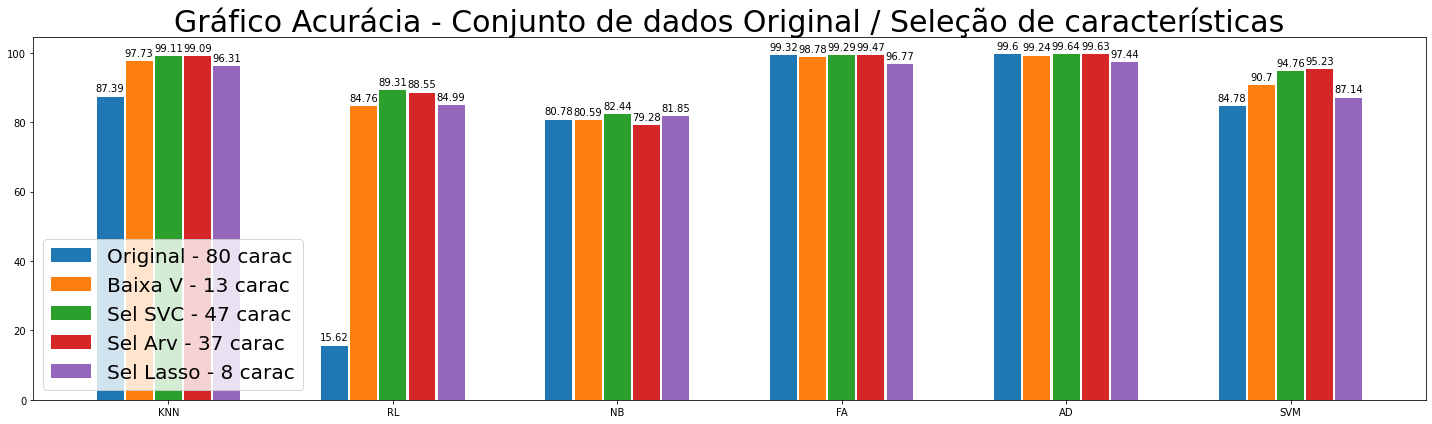

In [72]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

labels = ['KNN', 'RL', 'NB', 'FA', 'AD','SVM']

original = [round(acuraciaFF[0],2), round(acuraciaFF[5],2), round(acuraciaFF[10],2),
            round(acuraciaFF[15],2), round(acuraciaFF[20],2),round(acuraciaFF[25],2)]

bvariancia = [round(acuraciaFF[1],2), round(acuraciaFF[6],2), round(acuraciaFF[11],2), 
              round(acuraciaFF[16],2), round(acuraciaFF[21],2),round(acuraciaFF[26],2)]

selSVm = [round(acuraciaFF[2],2), round(acuraciaFF[7],2), round(acuraciaFF[12],2), 
          round(acuraciaFF[17],2), round(acuraciaFF[22],2),round(acuraciaFF[27],2)]

selArvo = [round(acuraciaFF[3],2), round(acuraciaFF[8],2), round(acuraciaFF[13],2), 
           round(acuraciaFF[18],2), round(acuraciaFF[23],2),round(acuraciaFF[28],2)]

selLasso = [round(acuraciaFF[4],2), round(acuraciaFF[9],2), round(acuraciaFF[14],2), 
            round(acuraciaFF[19],2), round(acuraciaFF[24],2),round(acuraciaFF[29],2)]

x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 6))
rects1 = ax.bar(x+width-0.38, original, width, label='Original - 80 carac')
rects2 = ax.bar(x+width-0.25, bvariancia, width, label='Baixa V - 13 carac')
rects5 = ax.bar(x+width-0.12, selSVm, width, label='Sel SVC - 47 carac')
rects4 = ax.bar(x+width+0.01, selArvo, width, label='Sel Arv - 37 carac')
rects3 = ax.bar(x+width+0.14, selLasso, width, label='Sel Lasso - 8 carac')

#+0.14
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('ACURÁCIA',fontsize=30)
ax.set_title('Gráfico Acurácia - Conjunto de dados Original / Seleção de características',fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3,fontsize=20)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
#autolabel(rects6)

fig.tight_layout()

#plt.show()
plt.savefig("graficoTodos.png")

In [60]:
for c in range(len(caracteristicas)):
    print(c, '--> ',len(caracteristicas[c]))

0 -->  80
1 -->  13
2 -->  47
3 -->  37
4 -->  8
5 -->  80
6 -->  13
7 -->  48
8 -->  36
9 -->  8
10 -->  80
11 -->  13
12 -->  47
13 -->  36
14 -->  8
15 -->  80
16 -->  13
17 -->  49
18 -->  38
19 -->  8
20 -->  80
21 -->  13
22 -->  47
23 -->  37
24 -->  8
25 -->  80
26 -->  13
27 -->  47
28 -->  37
29 -->  8


In [68]:
col = []
for i in dfr.columns:
    if (i in caracteristicas[2]) & (i in caracteristicas[3]):
        col.append(i)
   
print(len(col))

31


In [69]:
col

['Src Port',
 'Dst Port',
 'Protocol',
 'Flow Duration',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Max',
 'Flow IAT Mean',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Max',
 'Bwd IAT Max',
 'Fwd PSH Flags',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Variance',
 'FIN Flag Count',
 'RST Flag Count',
 'Average Packet Size',
 'Fwd Segment Size Avg',
 'Subflow Fwd Packets',
 'Subflow Fwd Bytes',
 'FWD Init Win Bytes',
 'Bwd Init Win Bytes',
 'Fwd Seg Size Min',
 'Label']

In [63]:
caracteristicas[3]

Index(['Src Port', 'Dst Port', 'Protocol', 'Flow Duration',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Flow Packets/s', 'Flow IAT Mean',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Max', 'Fwd PSH Flags',
       'Fwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Max', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'RST Flag Count',
       'Average Packet Size', 'Fwd Segment Size Avg', 'Bwd Segment Size Avg',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'FWD Init Win Bytes',
       'Bwd Init Win Bytes', 'Fwd Seg Size Min', 'Label'],
      dtype='object')

In [30]:
dfmrmr = dfr[:50000]
min_max_scaler = MinMaxScaler()
dfmrmr = min_max_scaler.fit_transform(dfmrmr.drop('Label',axis=1))

colmrmr = dfMac.drop('Label', axis=1)
cmrmr = colmrmr.columns
dfmrmr = pd.DataFrame(dfmrmr, columns=cmrmr)

In [31]:
ranqueado_ben = pymrmr.mRMR(dfmrmr, 'MIQ', 79)

In [33]:
ranqueado_ben

['Protocol',
 'Subflow Fwd Packets',
 'Fwd PSH Flags',
 'FWD Init Win Bytes',
 'FIN Flag Count',
 'Bwd Init Win Bytes',
 'Fwd Seg Size Min',
 'Packet Length Max',
 'Bwd Packet Length Std',
 'Fwd Packet Length Max',
 'Subflow Bwd Bytes',
 'Subflow Fwd Bytes',
 'Fwd Packets/s',
 'Packet Length Mean',
 'Down/Up Ratio',
 'Packet Length Min',
 'Fwd Segment Size Avg',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Min',
 'Packet Length Std',
 'Bwd Header Length',
 'Average Packet Size',
 'Idle Max',
 'Bwd Segment Size Avg',
 'Bwd Packet Length Min',
 'Total Length of Fwd Packet',
 'Idle Mean',
 'Idle Std',
 'Bwd Bulk Rate Avg',
 'Fwd IAT Mean',
 'Fwd Act Data Pkts',
 'Bwd Packets/s',
 'RST Flag Count',
 'Flow IAT Std',
 'Flow IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Max',
 'Bwd IAT Std',
 'SYN Flag Count',
 'Bwd Packet Length Max',
 'Packet Length Variance',
 'PSH Flag Count',
 'Bwd Packet Length Mean',
 'Idle Min',
 'Fwd IAT Max',
 'Bwd Packet/Bulk Avg',
 'Flow IAT Mean',
 'Bwd IAT Min',
 'Fwd 

In [305]:
ranqueado_ben

['Protocol',
 'Subflow Fwd Packets',
 'Fwd PSH Flags',
 'FWD Init Win Bytes',
 'FIN Flag Count',
 'Bwd Init Win Bytes',
 'Fwd Seg Size Min',
 'Packet Length Max',
 'Bwd Packet Length Std',
 'Fwd Packet Length Max',
 'Subflow Bwd Bytes',
 'Subflow Fwd Bytes',
 'Fwd Packets/s',
 'Packet Length Mean',
 'Down/Up Ratio',
 'Packet Length Min',
 'Fwd Segment Size Avg',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Min',
 'Packet Length Std',
 'Bwd Header Length',
 'Average Packet Size',
 'Idle Max',
 'Bwd Segment Size Avg',
 'Bwd Packet Length Min',
 'Total Length of Fwd Packet',
 'Idle Mean',
 'Idle Std',
 'Bwd Bulk Rate Avg',
 'Fwd IAT Mean',
 'Fwd Act Data Pkts',
 'Bwd Packets/s',
 'RST Flag Count',
 'Flow IAT Std',
 'Flow IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Max',
 'Bwd IAT Std',
 'SYN Flag Count',
 'Bwd Packet Length Max',
 'Packet Length Variance',
 'PSH Flag Count',
 'Bwd Packet Length Mean',
 'Idle Min',
 'Fwd IAT Max',
 'Bwd Packet/Bulk Avg',
 'Flow IAT Mean',
 'Bwd IAT Min',
 'Fwd 

In [38]:
def mrmr(norClas=False):
    acuraciaMFMF = []
    
     
    for ML in clasMRMR:
        acuraciaMFMF.append('Original')
        acuraciaMFMF.append(ML(dfr,norm=False))
        acuraciaMFMF.append('MRMR')
        rank5 = dfr[ranqueado_ben[:5]][:100000]
        rank5['Label'] = dfr['Label'][:100000]
        acuraciaMFMF.append(ML(rank5,norm=norClas))
        
        rank10 = dfr[ranqueado_ben[:10]][:100000]
        rank10['Label'] = dfr['Label'][:100000]
        acuraciaMFMF.append(ML(rank10,norm=norClas))
        
        rank20 = dfr[ranqueado_ben[:20]][:100000]
        rank20['Label'] = dfr['Label'][:100000]
        acuraciaMFMF.append(ML(rank20,norm=norClas))
        
        rank30 = dfr[ranqueado_ben[:30]][:100000]
        rank30['Label'] = dfr['Label'][:100000]
        acuraciaMFMF.append(ML(rank30,norm=norClas))
        
        rank40 = dfr[ranqueado_ben[:40]][:100000]
        rank40['Label'] = dfr['Label'][:100000]
        acuraciaMFMF.append(ML(rank40,norm=norClas))
        
        
    return acuraciaMFMF

In [41]:
clasMRMR = [knn,regressaoLogistica,naiveBayes,arvoreDecisao,florestaAleatoria,svm]
acuraciaMFMF = mrmr(norClas=False)

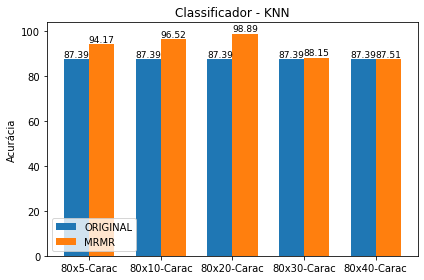

In [42]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['80x5-Carac', '80x10-Carac', '80x20-Carac', '80x30-Carac', '80x40-Carac']
men_means = [round(acuraciaMFMF[1],2), round(acuraciaMFMF[1],2), 
             round(acuraciaMFMF[1],2), round(acuraciaMFMF[1],2), round(acuraciaMFMF[1],2)]
women_means = [round(acuraciaMFMF[3],2), round(acuraciaMFMF[4],2), 
             round(acuraciaMFMF[5],2), round(acuraciaMFMF[6],2), round(acuraciaMFMF[7],2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='ORIGINAL')
rects2 = ax.bar(x + width/2, women_means, width, label='MRMR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Classificador - KNN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=9)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.show()
plt.savefig("KNN.png")

In [190]:
print(acuraciaMFMF[9:16])

[14.545454545454545, 'MRMR', 85.45454545454545, 85.45454545454545, 86.96969696969697, 14.545454545454545, 14.545454545454545]


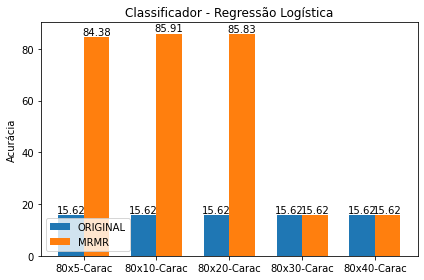

In [43]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['80x5-Carac', '80x10-Carac', '80x20-Carac', '80x30-Carac', '80x40-Carac']
men_means = [round(acuraciaMFMF[9],2), round(acuraciaMFMF[9],2), 
             round(acuraciaMFMF[9],2), round(acuraciaMFMF[9],2), round(acuraciaMFMF[9],2)]
women_means = [round(acuraciaMFMF[11],2), round(acuraciaMFMF[12],2), 
             round(acuraciaMFMF[13],2), round(acuraciaMFMF[14],2), round(acuraciaMFMF[15],2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='ORIGINAL')
rects2 = ax.bar(x + width/2, women_means, width, label='MRMR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Classificador - Regressão Logística')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.show()
plt.savefig("RegressaoLogistica.png")

In [191]:
print(acuraciaMFMF[16:24])

['Original', 84.66666666666667, 'MRMR', 80.66666666666666, 85.0, 85.0, 84.66666666666667, 84.66666666666667]


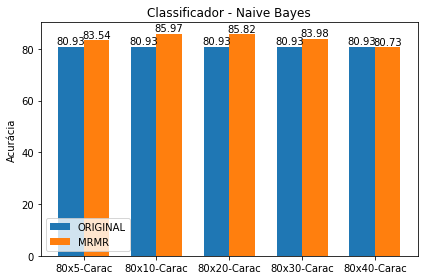

In [44]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['80x5-Carac', '80x10-Carac', '80x20-Carac', '80x30-Carac', '80x40-Carac']
men_means = [round(acuraciaMFMF[17],2), round(acuraciaMFMF[17],2), 
             round(acuraciaMFMF[17],2), round(acuraciaMFMF[17],2), round(acuraciaMFMF[17],2)]
women_means = [round(acuraciaMFMF[19],2), round(acuraciaMFMF[20],2), 
             round(acuraciaMFMF[21],2), round(acuraciaMFMF[22],2), round(acuraciaMFMF[23],2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='ORIGINAL')
rects2 = ax.bar(x + width/2, women_means, width, label='MRMR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Classificador - Naive Bayes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.show()
plt.savefig("NaiveBayes.jpg")

In [196]:
print(acuraciaMFMF[24:32])

['Original', 97.66666666666667, 'MRMR', 95.33333333333334, 94.33333333333334, 96.66666666666667, 96.66666666666667, 97.0]


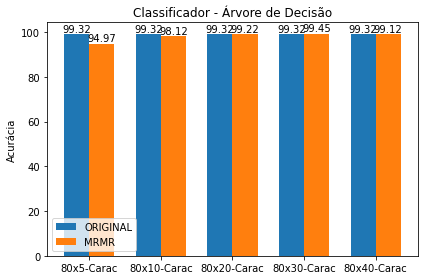

In [45]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['80x5-Carac', '80x10-Carac', '80x20-Carac', '80x30-Carac', '80x40-Carac']
men_means = [round(acuraciaMFMF[25],2), round(acuraciaMFMF[25],2), 
             round(acuraciaMFMF[25],2), round(acuraciaMFMF[25],2), round(acuraciaMFMF[25],2)]
women_means = [round(acuraciaMFMF[27],2), round(acuraciaMFMF[28],2), 
             round(acuraciaMFMF[29],2), round(acuraciaMFMF[30],2), round(acuraciaMFMF[31],2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='ORIGINAL')
rects2 = ax.bar(x + width/2, women_means, width, label='MRMR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Classificador - Árvore de Decisão')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.show()
plt.savefig("ArvoreDecisao.png")

In [197]:
print(acuraciaMFMF[32:40])

['Original', 97.0, 'MRMR', 95.0, 97.66666666666667, 96.33333333333334, 98.66666666666667, 97.0]


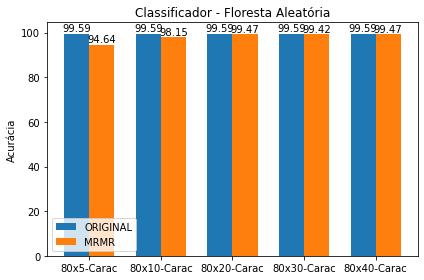

In [46]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['80x5-Carac', '80x10-Carac', '80x20-Carac', '80x30-Carac', '80x40-Carac']
men_means = [round(acuraciaMFMF[33],2), round(acuraciaMFMF[33],2), 
             round(acuraciaMFMF[33],2), round(acuraciaMFMF[33],2), round(acuraciaMFMF[33],2)]
women_means = [round(acuraciaMFMF[35],2), round(acuraciaMFMF[36],2), 
             round(acuraciaMFMF[37],2), round(acuraciaMFMF[38],2), round(acuraciaMFMF[39],2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='ORIGINAL')
rects2 = ax.bar(x + width/2, women_means, width, label='MRMR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Classificador - Floresta Aleatória')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.show()
plt.savefig("FlorestaAleatoria.png")

In [198]:
print(acuraciaMFMF[40:48])

['Original', 84.66666666666667, 'MRMR', 84.66666666666667, 86.0, 86.0, 84.66666666666667, 84.66666666666667]


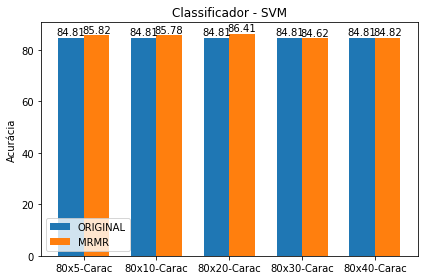

In [47]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['80x5-Carac', '80x10-Carac', '80x20-Carac', '80x30-Carac', '80x40-Carac']
men_means = [round(acuraciaMFMF[41],2), round(acuraciaMFMF[41],2), 
             round(acuraciaMFMF[41],2), round(acuraciaMFMF[41],2), round(acuraciaMFMF[41],2)]
women_means = [round(acuraciaMFMF[43],2), round(acuraciaMFMF[44],2), 
             round(acuraciaMFMF[45],2), round(acuraciaMFMF[46],2), round(acuraciaMFMF[47],2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='ORIGINAL')
rects2 = ax.bar(x + width/2, women_means, width, label='MRMR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Classificador - SVM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.show()
plt.savefig("SVM.png")

<Figure size 864x432 with 0 Axes>

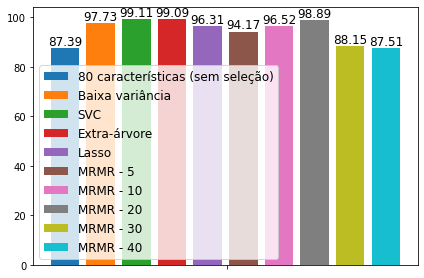

In [340]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

labels = ['']

original = [round(acuraciaFF[0],2)]

bvariancia = [round(acuraciaFF[1],2)]

selSVm = [round(acuraciaFF[2],2)]

selArvo = [round(acuraciaFF[3],2)]

selLasso = [round(acuraciaFF[4],2)]

MRMR5 =  [round(acuraciaMFMF[3],2)]
MRMR10 = [round(acuraciaMFMF[4],2)]
MRMR20 = [round(acuraciaMFMF[5],2)]
MRMR30 = [round(acuraciaMFMF[6],2)]
MRMR40 = [round(acuraciaMFMF[7],2)]




x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+width-0.80, original, width, label='80 features (without selection)')
rects2 = ax.bar(x+width-0.65, bvariancia, width, label='Low variance')
rects3 = ax.bar(x+width-0.50, selSVm, width, label='SVC')
rects4 = ax.bar(x+width-0.35, selArvo, width, label='Extra-tree')
rects5 = ax.bar(x+width-0.20, selLasso, width, label='Lasso')


rects6 = ax.bar(x+width-0.05, MRMR5, width, label='MRMR - 5')
rects7 = ax.bar(x+width+0.10, MRMR10, width, label='MRMR - 10')
rects8 = ax.bar(x+width+0.25, MRMR20, width, label='MRMR - 20')
rects9 = ax.bar(x+width+0.40, MRMR30, width, label='MRMR - 30')
rects10 = ax.bar(x+width+0.55, MRMR40, width, label='MRMR - 40')

#+0.14
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('ACURÁCIA',fontsize=30)
#ax.set_title('Gráfico de acurácia', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=20)
ax.legend(loc=3,fontsize=12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)

fig.tight_layout()

#plt.show()
plt.savefig("knnTodos.png")

In [304]:
len(caracteristicas[4])

8

<Figure size 864x432 with 0 Axes>

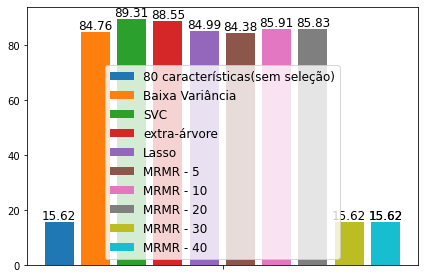

In [347]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

labels = ['']

original = [round(acuraciaFF[5],2)]

bvariancia = [round(acuraciaFF[6],2)]

selSVm = [round(acuraciaFF[7],2)]

selArvo = [round(acuraciaFF[8],2)]

selLasso = [round(acuraciaFF[9],2)]

MRMR5 =  [round(acuraciaMFMF[11],2)]
MRMR10 = [round(acuraciaMFMF[12],2)]
MRMR20 = [round(acuraciaMFMF[13],2)]
MRMR30 = [round(acuraciaMFMF[14],2)]
MRMR40 = [round(acuraciaMFMF[15],2)]

#MRMR40 = [100]




x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+width-0.80, original, width, label='80 características(sem seleção)')
rects2 = ax.bar(x+width-0.65, bvariancia, width, label='Baixa Variância')
rects3 = ax.bar(x+width-0.50, selSVm, width, label='SVC')
rects4 = ax.bar(x+width-0.35, selArvo, width, label='extra-árvore')
rects5 = ax.bar(x+width-0.20, selLasso, width, label='Lasso')


rects6 = ax.bar(x+width-0.05, MRMR5, width, label='MRMR - 5')
rects7 = ax.bar(x+width+0.10, MRMR10, width, label='MRMR - 10')
rects8 = ax.bar(x+width+0.25, MRMR20, width, label='MRMR - 20')
rects9 = ax.bar(x+width+0.40, MRMR30, width, label='MRMR - 30')
rects10 = ax.bar(x+width+0.55, MRMR40, width, label='MRMR - 40')

#rects11 = ax.bar(x+width+0.55, MRMR40, width, label='MRMR - 40')

#+0.14
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('ACURÁCIA',fontsize=30)
#ax.set_title('Gráfico de acurácia', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12)
ax.legend(loc=8,fontsize=12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)
autolabel(rects11)

fig.tight_layout()

#plt.show()
plt.savefig("rlTodos.png")

<Figure size 864x432 with 0 Axes>

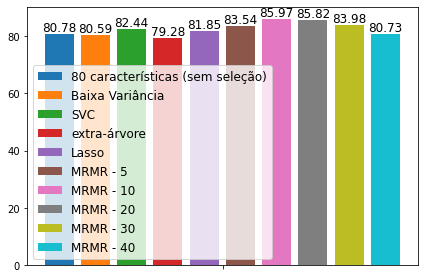

In [348]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

labels = ['']

original = [round(acuraciaFF[10],2)]

bvariancia = [round(acuraciaFF[11],2)]

selSVm = [round(acuraciaFF[12],2)]

selArvo = [round(acuraciaFF[13],2)]

selLasso = [round(acuraciaFF[14],2)]

MRMR5 =  [round(acuraciaMFMF[19],2)]
MRMR10 = [round(acuraciaMFMF[20],2)]
MRMR20 = [round(acuraciaMFMF[21],2)]
MRMR30 = [round(acuraciaMFMF[22],2)]
MRMR40 = [round(acuraciaMFMF[23],2)]




x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+width-0.80, original, width, label='80 características (sem seleção)')
rects2 = ax.bar(x+width-0.65, bvariancia, width, label='Baixa Variância')
rects3 = ax.bar(x+width-0.50, selSVm, width, label='SVC')
rects4 = ax.bar(x+width-0.35, selArvo, width, label='extra-árvore')
rects5 = ax.bar(x+width-0.20, selLasso, width, label='Lasso')


rects6 = ax.bar(x+width-0.05, MRMR5, width, label='MRMR - 5')
rects7 = ax.bar(x+width+0.10, MRMR10, width, label='MRMR - 10')
rects8 = ax.bar(x+width+0.25, MRMR20, width, label='MRMR - 20')
rects9 = ax.bar(x+width+0.40, MRMR30, width, label='MRMR - 30')
rects10 = ax.bar(x+width+0.55, MRMR40, width, label='MRMR - 40')

#+0.14
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('ACURÁCIA',fontsize=30)
#ax.set_title('Gráfico de acurácia', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12)
ax.legend(loc=3,fontsize=12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)

fig.tight_layout()

#plt.show()
plt.savefig("nbTodos.png")

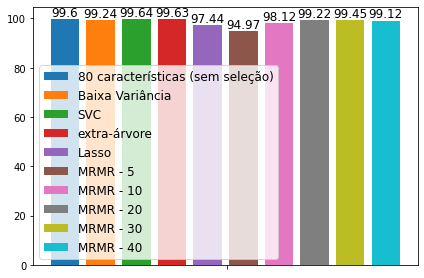

In [349]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#plt.figure()

labels = ['']

original = [round(acuraciaFF[20],2)]

bvariancia = [round(acuraciaFF[21],2)]

selSVm = [round(acuraciaFF[22],2)]

selArvo = [round(acuraciaFF[23],2)]

selLasso = [round(acuraciaFF[24],2)]

MRMR5 =  [round(acuraciaMFMF[27],2)]
MRMR10 = [round(acuraciaMFMF[28],2)]
MRMR20 = [round(acuraciaMFMF[29],2)]
MRMR30 = [round(acuraciaMFMF[30],2)]
MRMR40 = [round(acuraciaMFMF[31],2)]




x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+width-0.80, original, width, label='80 características (sem seleção)')
rects2 = ax.bar(x+width-0.65, bvariancia, width, label='Baixa Variância')
rects3 = ax.bar(x+width-0.50, selSVm, width, label='SVC')
rects4 = ax.bar(x+width-0.35, selArvo, width, label='extra-árvore')
rects5 = ax.bar(x+width-0.20, selLasso, width, label='Lasso')


rects6 = ax.bar(x+width-0.05, MRMR5, width, label='MRMR - 5')
rects7 = ax.bar(x+width+0.10, MRMR10, width, label='MRMR - 10')
rects8 = ax.bar(x+width+0.25, MRMR20, width, label='MRMR - 20')
rects9 = ax.bar(x+width+0.40, MRMR30, width, label='MRMR - 30')
rects10 = ax.bar(x+width+0.55, MRMR40, width, label='MRMR - 40')

#+0.14
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('ACURÁCIA',fontsize=30)
#ax.set_title('Gráfico de acurácia', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12)
ax.legend(loc=3,fontsize=12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)

fig.tight_layout()

#plt.show()
plt.savefig("adTodos.png")

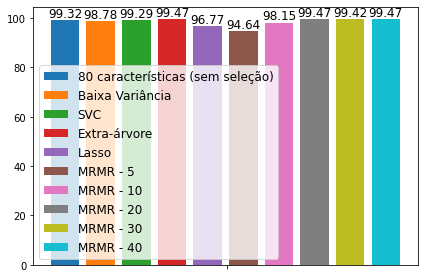

In [350]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(12,6))

labels = ['']

original = [round(acuraciaFF[15],2)]

bvariancia = [round(acuraciaFF[16],2)]

selSVm = [round(acuraciaFF[17],2)]

selArvo = [round(acuraciaFF[18],2)]

selLasso = [round(acuraciaFF[19],2)]

MRMR5 =  [round(acuraciaMFMF[35],2)]
MRMR10 = [round(acuraciaMFMF[36],2)]
MRMR20 = [round(acuraciaMFMF[37],2)]
MRMR30 = [round(acuraciaMFMF[38],2)]
MRMR40 = [round(acuraciaMFMF[39],2)]




x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+width-0.80, original, width, label='80 características (sem seleção)')
rects2 = ax.bar(x+width-0.65, bvariancia, width, label='Baixa Variância')
rects3 = ax.bar(x+width-0.50, selSVm, width, label='SVC')
rects4 = ax.bar(x+width-0.35, selArvo, width, label='Extra-árvore')
rects5 = ax.bar(x+width-0.20, selLasso, width, label='Lasso')


rects6 = ax.bar(x+width-0.05, MRMR5, width, label='MRMR - 5')
rects7 = ax.bar(x+width+0.10, MRMR10, width, label='MRMR - 10')
rects8 = ax.bar(x+width+0.25, MRMR20, width, label='MRMR - 20')
rects9 = ax.bar(x+width+0.40, MRMR30, width, label='MRMR - 30')
rects10 = ax.bar(x+width+0.55, MRMR40, width, label='MRMR - 40')

#+0.14
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('ACURÁCIA',fontsize=30)
#ax.set_title('Gráfico de acurácia', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12)
ax.legend(loc=3,fontsize=12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)

fig.tight_layout()

#plt.show()
plt.savefig("faTodos.png")

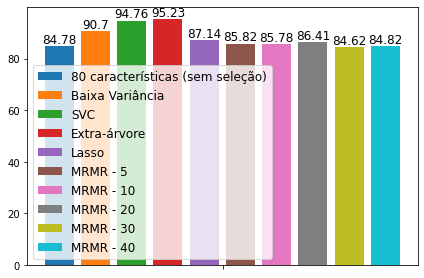

In [351]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(12,6))

labels = ['']

original = [round(acuraciaFF[25],2)]

bvariancia = [round(acuraciaFF[26],2)]

selSVm = [round(acuraciaFF[27],2)]

selArvo = [round(acuraciaFF[28],2)]

selLasso = [round(acuraciaFF[29],2)]

MRMR5 =  [round(acuraciaMFMF[43],2)]
MRMR10 = [round(acuraciaMFMF[44],2)]
MRMR20 = [round(acuraciaMFMF[45],2)]
MRMR30 = [round(acuraciaMFMF[46],2)]
MRMR40 = [round(acuraciaMFMF[47],2)]




x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x+width-0.80, original, width, label='80 características (sem seleção)')
rects2 = ax.bar(x+width-0.65, bvariancia, width, label='Baixa Variância')
rects3 = ax.bar(x+width-0.50, selSVm, width, label='SVC')
rects4 = ax.bar(x+width-0.35, selArvo, width, label='Extra-árvore')
rects5 = ax.bar(x+width-0.20, selLasso, width, label='Lasso')


rects6 = ax.bar(x+width-0.05, MRMR5, width, label='MRMR - 5')
rects7 = ax.bar(x+width+0.10, MRMR10, width, label='MRMR - 10')
rects8 = ax.bar(x+width+0.25, MRMR20, width, label='MRMR - 20')
rects9 = ax.bar(x+width+0.40, MRMR30, width, label='MRMR - 30')
rects10 = ax.bar(x+width+0.55, MRMR40, width, label='MRMR - 40')

#+0.14
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
#ax.set_ylabel('ACURÁCIA',fontsize=30)
#ax.set_title('Acurácia', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize=12)
ax.legend(loc=3,fontsize=12)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=12)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)

fig.tight_layout()

#plt.show()
plt.savefig("svmTodos.png")

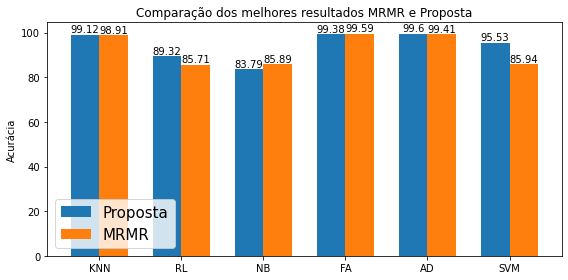

In [48]:
import matplotlib.pyplot as plt
import numpy as np

#plt.figure(figsize=(20,10))

labels = ['KNN', 'RL', 'NB', 'FA', 'AD', 'SVM']
women_means = [98.91, 85.71, 85.89, 99.59, 99.41,85.94]
men_means = [99.12, 89.32, 83.79, 99.38, 99.60,95.53]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.bar(x - width/2, men_means, width, label='Proposta')
rects2 = ax.bar(x + width/2, women_means, width, label='MRMR')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Acurácia')
ax.set_title('Comparação dos melhores resultados MRMR e Proposta')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3,fontsize=15)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.show()
plt.savefig("MrmrPorposta.png")

In [73]:
len(dfr[col])

100000

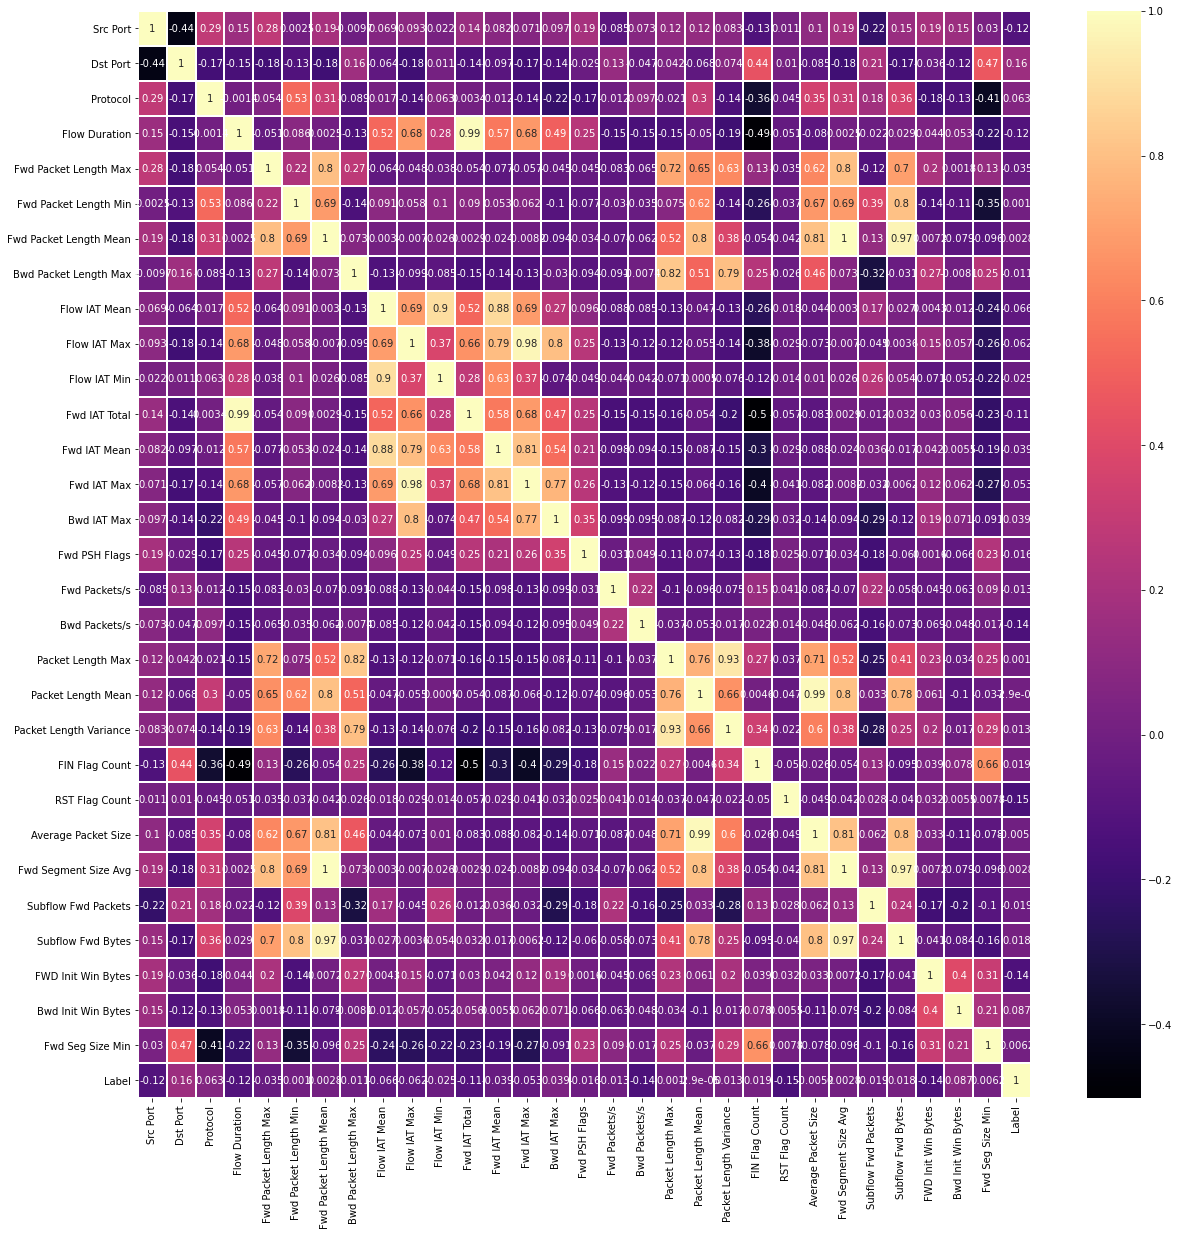

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(dfr[col].corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)
plt.savefig("matriz.png")

## Acurácia - Classificação

In [154]:
def acuracia(classificador,norm=False,norm1=False):
    score = []
    f0 = classificador(dfr,norm)
    score.append(f0)
    print('Acurácia: Original ',f0)
    print(f'Amostras: {dfr.shape[0]} - Características {dfr.shape[1]}')
    print('-------------------------------------------------------')
    f1 = classificador(baixaVariancia(dfr,80,norm1),norm)
    score.append(f1)
    print('Acuracia: Selecionado Baixa Variancia ',f1)
    print(f'Amostras: {baixaVariancia(dfr,80,norm1).shape[0]} - Características {baixaVariancia(dfr,80,norm1).shape[1]}')
    print('-------------------------------------------------------')
    f2 = classificador(SelecLasso(dfr,norm1),norm)
    score.append(f2)
    print('Acurácia: Selecionado Select Lasso ',f2)
    print(f'Amostras: {SelecLasso(dfr,norm1).shape[0]} - Características {SelecLasso(dfr,norm1).shape[1]}')
    print('-------------------------------------------------------')
    f3 = classificador(selectArvore(dfr,norm1),norm)
    score.append(f3)
    print('Acurácia: Selecionado Select Arvore ',f3)
    print(f'Amostras: {selectArvore(dfr,norm1).shape[0]} - Características {selectArvore(dfr,norm1).shape[1]}')
    print('-------------------------------------------------------')
    f4 = classificador(svmSel(dfr,norm1),norm)
    score.append(f4)
    print('Acurácia: Selecionado SVM ',f4)
    print(f'Amostras: {svmSel(dfr,norm1).shape[0]} - Características {svmSel(dfr,norm1).shape[1]}')
    print('\n')
    if norm == True:
        normal = 'Normalizado'
    else:
        normal = 'NÃO normalizado'
    if norm1 == True:
        normal1 = 'Normalizado'
    else:
        normal1 = 'NÃO normalizado'
    print('----------------------------------------------------------------------------------')
    print(F'A maior acurácia com Classificador {normal1} Seletor: {normal}: ',max(score))
    print('----------------------------------------------------------------------------------')
    print('\n')
    return score

In [ ]:
acuracia(knn)

## Seleciona o classificador

In [155]:
def imprimeTudo(clasf,normS=False,normT=False):
     
    for c in clasf:
        #knn_,rl_,nb_,ad_,fa_,svm = []
        if c == 'knn':
            print('CLASSIFICADOR: ',c)
            print('\n')
            acuracia(knn,normS,normT)
            #knn_.append(acuracia(knn,normS,normT))
        elif c == 'regressaoLogistica':
            print('CLASSIFICADOR: ',c)
            print('\n')
            acuracia(regressaoLogistica,normS,normT)
            #rl_.append(acuracia(regressaoLogistica,normS,normT))
        elif c == 'naiveBayes':
            print('CLASSIFICADOR: ',c)
            print('\n')
            acuracia(naiveBayes,normS,normT)
            #nb_.append(acuracia(naiveBayes,normS,normT))
        elif c == 'arvoreDecisao':
            print('CLASSIFICADOR: ',c)
            print('\n')
            acuracia(arvoreDecisao,normS,normT)
            #ad_.append(arvoreDecisao,normS,normT)
        elif c == 'florestaAleatoria':
            print('CLASSIFICADOR: ',c)
            print('\n')
            acuracia(florestaAleatoria,normS,normT)
            #fa_.append(florestaAleatoria,normS,normT)
        elif c == 'svm':
            print('CLASSIFICADOR: ',c)
            print('\n')
            acuracia(svm,normS,normT)
            #svm_.append(acuracia(svm,normS,normT))
        else:
            print('Não é um classificador!')
        #return  
        


## Retorna Acurácia

In [160]:
#clas = ['knn','regressaoLogistica','naiveBayes','arvoreDecisao','florestaAleatoria','svm']
def imprimeAcc(normal1=False, normal2=False):
    acc = []
    
    print('KNN')
    print('\n')
    acc.append(acuracia(knn,normal1,normal2))
    print('Repressão Lógistica')
    print('\n')
    acc.append(acuracia(regressaoLogistica,normal1,normal2))
    print('Naive Bayes')
    print('\n')
    acc.append(acuracia(naiveBayes,normal1,normal2))
    print('Árvore de Decisão')
    print('\n')
    acc.append(acuracia(arvoreDecisao,normal1,normal2))
    print('Floresta Aleatória')
    print('\n')
    acc.append(acuracia(florestaAleatoria,normal1,normal2))
    print('SVM')
    print('\n')
    acc.append(acuracia(svm,normal1,normal2))
    return acc

## IMPRIME TUDO SELECIONAR O CLASSIFICADOR

In [156]:
dfr = dfOriginal('mac',1000)
clas = ['knn','regressaoLogistica','naiveBayes','arvoreDecisao','florestaAleatoria','svm']
#clas = ['knn']
#paramentro 1 = classficador
#paramentro 2 = normalizar seletor de caracerísticas
#paramentro 3 = normalizar o classificador
#tes = imprimeTudo(clas,False,True)

Dataset IoT Selecionado com 1000 amostras


# RESULTADOS DATASET IOT E NÃO IOT BENIGNO

### SELECIONA O DATASET

In [31]:
# 'mac' => Dataet IOT
# 'ataque' => Dataet Ataque 
# 'mesclado' => Dataet Mesclado
dfr = dfOriginal('mac',50000)

Dataset IoT Selecionado com 50000 amostras


## ADD Acurácia

In [159]:
acuraciaFF = imprimeAcc(normal1=True, normal2=True)

KNN


Acurácia: Original  96.0
Amostras: 1000 - Características 80
-------------------------------------------------------
Acuracia: Selecionado Baixa Variancia  89.33333333333333
Amostras: 1000 - Características 6
-------------------------------------------------------


AttributeError: 'tuple' object has no attribute 'drop'

In [145]:
acuraciaTT = imprimeAcc(normal1=True, normal2=True)

KNN


Acurácia: Original  96.0
Amostras: 1000 - Características 80
-------------------------------------------------------
Acuracia: Selecionado Baixa Variancia  89.33333333333333
Amostras: 1000 - Características 6
-------------------------------------------------------


TypeError: tuple indices must be integers or slices, not str

In [59]:
acuraciaFT = imprimeAcc(normal1=False, normal2=True)

KNN


Acurácia: Original  79.33333333333333
Amostras: 1000 - Características 80
-------------------------------------------------------
Acuracia: Selecionado Baixa Variancia  79.33333333333333
Amostras: 1000 - Características 63
-------------------------------------------------------


AttributeError: 'tuple' object has no attribute 'drop'

In [77]:
acuraciaTF = imprimeAcc(normal1=True, normal2=False)

KNN


Acurácia: Original  100.0
Amostras: 10000 - Características 80
-------------------------------------------------------
Acuracia: Selecionado Baixa Variancia  99.4
Amostras: 10000 - Características 3
-------------------------------------------------------


AttributeError: 'tuple' object has no attribute 'drop'

## Seleção de características comum em todas os DF gerado (PONTO DE INTERSEÇÃO)

In [710]:
def colDf(norm=False):
    col = []
    colTodos = []
    Label = []
    c1 = baixaVariancia(dfr,80,norm)
    colTodos.append(c1)
    #Label.append('Baixa Variância')
    print('Baixa Variância: \n\n',np.array(c1.columns))
    print('\n')
    print('------------------------------------------------------------------------------')
    print('\n')
    c2 = SelecLasso(dfr,norm)
    colTodos.append(c2)
    #Label.append('Seleção Lasso')
    print('Seleção Lasso: \n\n',np.array(c2.columns))
    print('\n')
    c3 = selectArvore(dfr,norm)
    colTodos.append(c3)
    #Label.append('Seleção Árvore')
    print('\n')
    print('------------------------------------------------------------------------------')
    print('\n')
    print('Seleção Árvore: \n\n',np.array(c3.columns))
    print('\n')
    c4 = svmSel(dfr,norm)
    colTodos.append(c4)
    #Label.append('Seleção SVM')
    print('\n')
    print('------------------------------------------------------------------------------')
    print('\n')
    print('Seleção SVM: \n\n',np.array(c4.columns))
    
    for i in dfr.columns:
        if (i in c1.columns) & (i in c2.columns) & (i in c3.columns) & (i in c4.columns):
            col.append(i)
    print('\n')
    print('------------------------------------------------------------------------------')
    print('\n')
    print('COLUNAS EM COMUM : \n\n', col)
    dfColunaComum = dfr[col]
    return colTodos, dfColunaComum

    

In [703]:
#colTodos =  restorno os datasets com o teste com todos os seletores
#colComum = retorna o dataset com as colunas em comum com todos os seletores
colTodos, colComum = colDf(norm=True)

Baixa Variância: 

 ['Subflow Fwd Packets' 'Idle Mean' 'Idle Max' 'Idle Min' 'Label']


------------------------------------------------------------------------------


Seleção Lasso: 

 ['Total Fwd Packet' 'Fwd Packet Length Mean' 'Bwd Packet Length Min'
 'Bwd Packet Length Mean' 'Flow IAT Mean' 'Flow IAT Std' 'Flow IAT Max'
 'Flow IAT Min' 'Bwd IAT Mean' 'Bwd IAT Std' 'Bwd IAT Max' 'Bwd IAT Min'
 'Bwd Packets/s' 'Packet Length Mean' 'RST Flag Count' 'PSH Flag Count'
 'Average Packet Size' 'Bwd Bulk Rate Avg' 'Subflow Fwd Bytes'
 'Subflow Bwd Bytes' 'Label']




------------------------------------------------------------------------------


Seleção Árvore: 

 ['Src Port' 'Dst Port' 'Protocol' 'Flow Duration' 'Fwd Packet Length Max'
 'Fwd Packet Length Min' 'Fwd Packet Length Mean' 'Bwd Packet Length Max'
 'Bwd Packet Length Mean' 'Flow Packets/s' 'Flow IAT Mean' 'Flow IAT Max'
 'Flow IAT Min' 'Fwd IAT Total' 'Fwd IAT Mean' 'Fwd IAT Max' 'Fwd IAT Min'
 'Fwd PSH Flags' 'Fwd Header Leng

### Baixa Variância

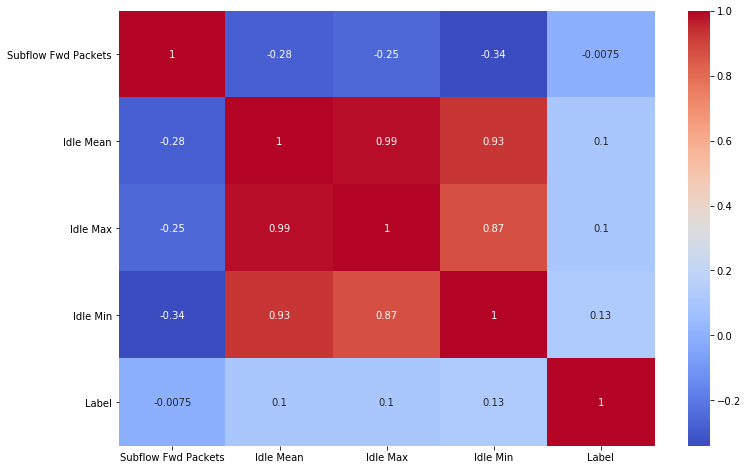

In [708]:
plt.figure(figsize=(12,8))
sns.heatmap(colTodos[0].corr(),cmap='coolwarm', annot=True)

## Seleção Lasso

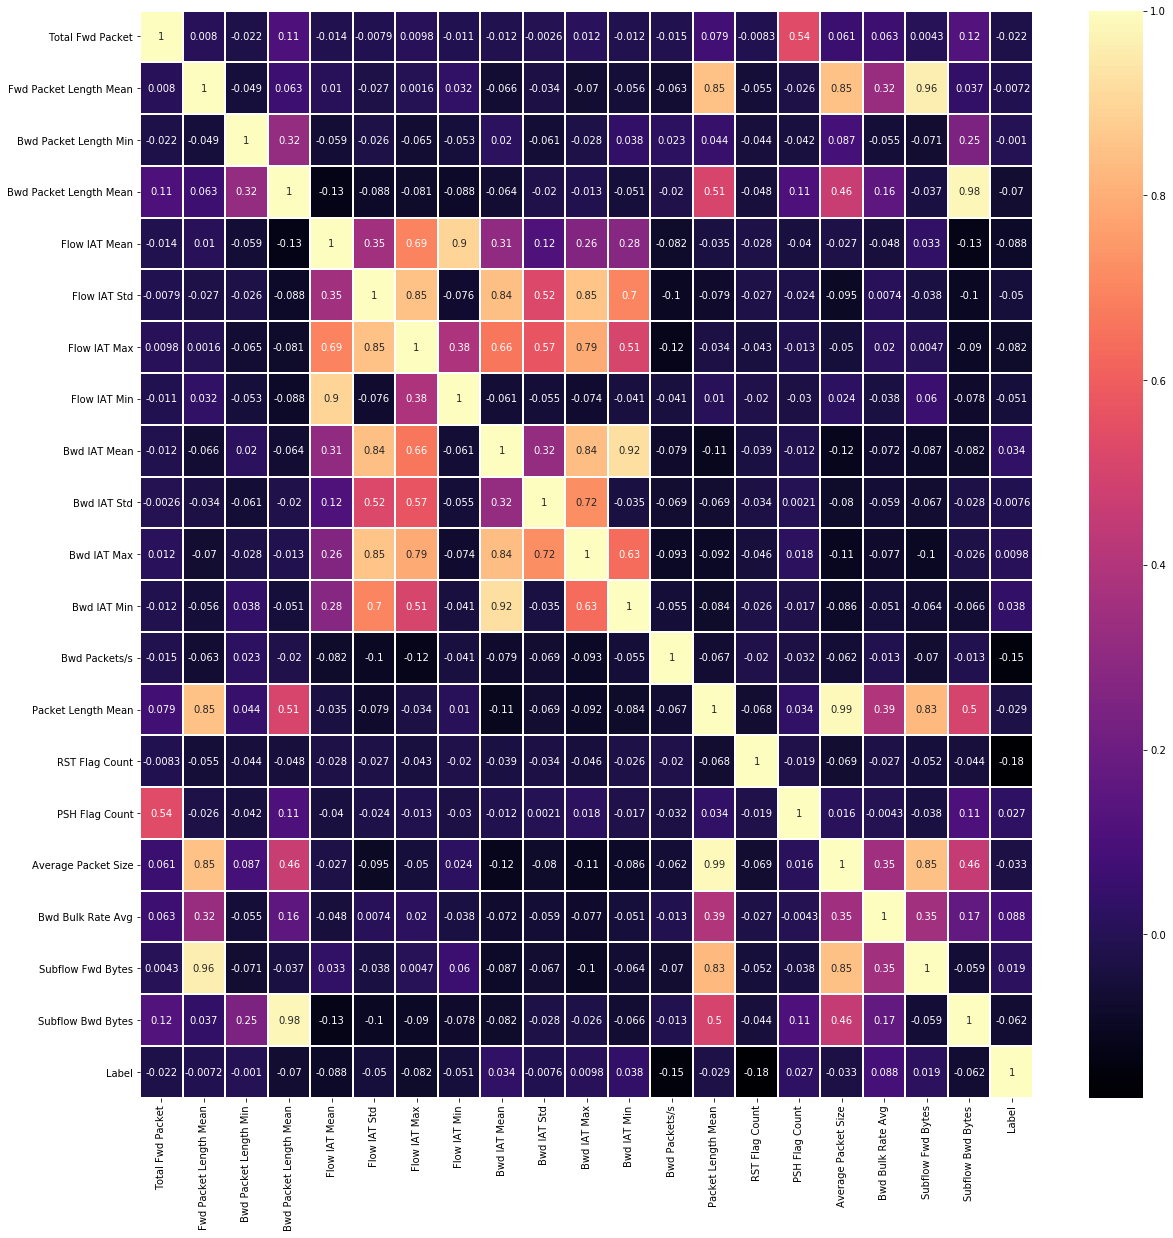

In [705]:
plt.figure(figsize=(20,20))
sns.heatmap(colTodos[1].corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

### Seleção Árvore

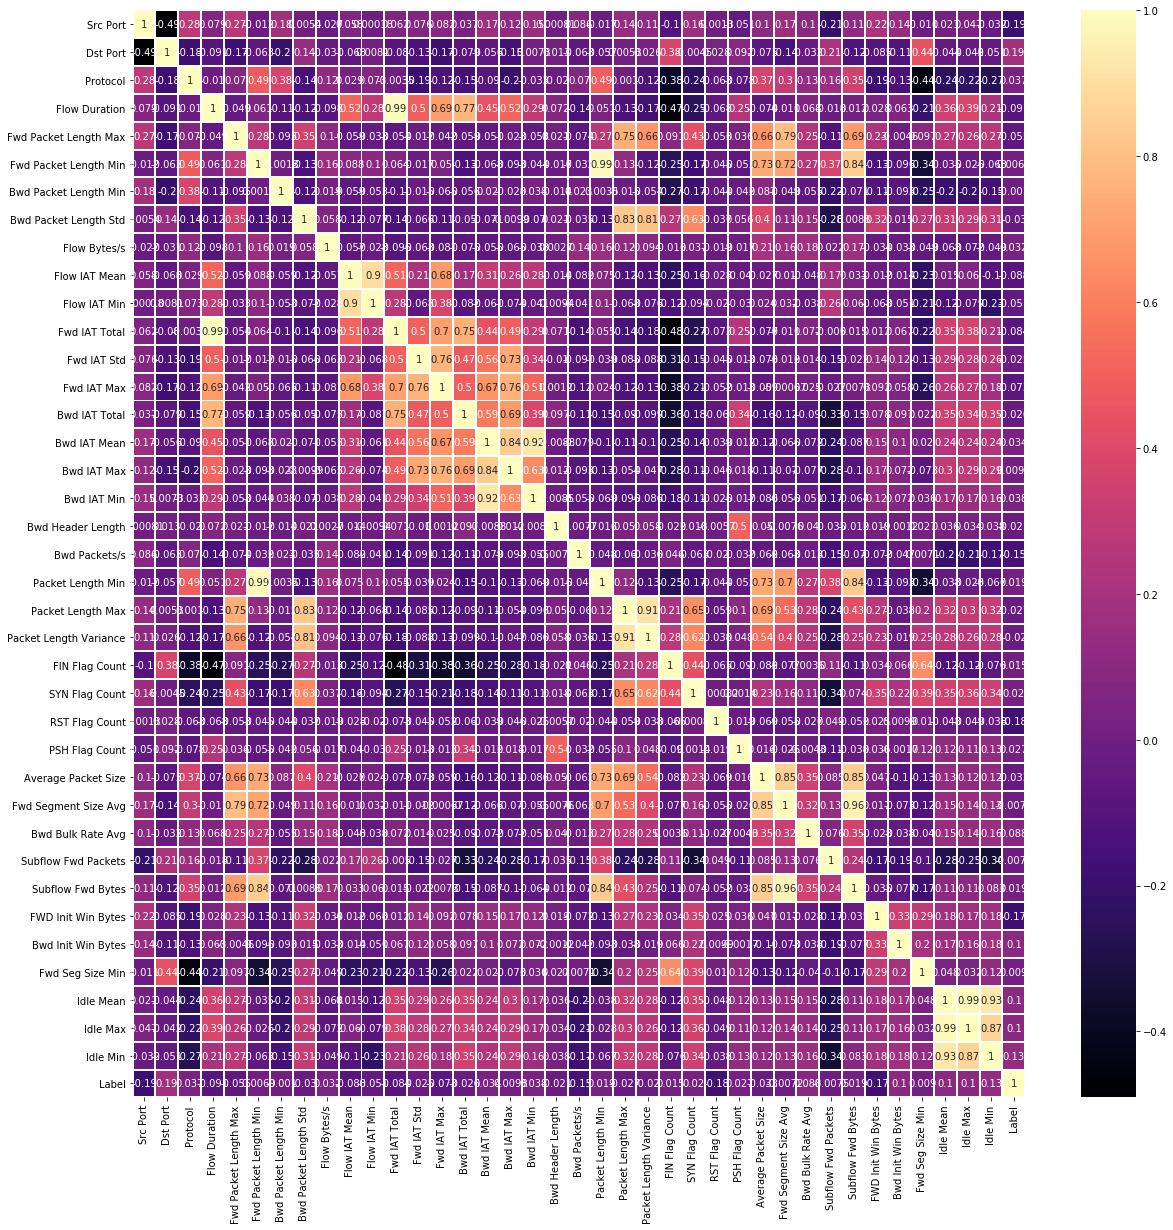

In [706]:
plt.figure(figsize=(20,20))
sns.heatmap(colTodos[3].corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

### Dtaaset Seleção Características Comum (interseção)

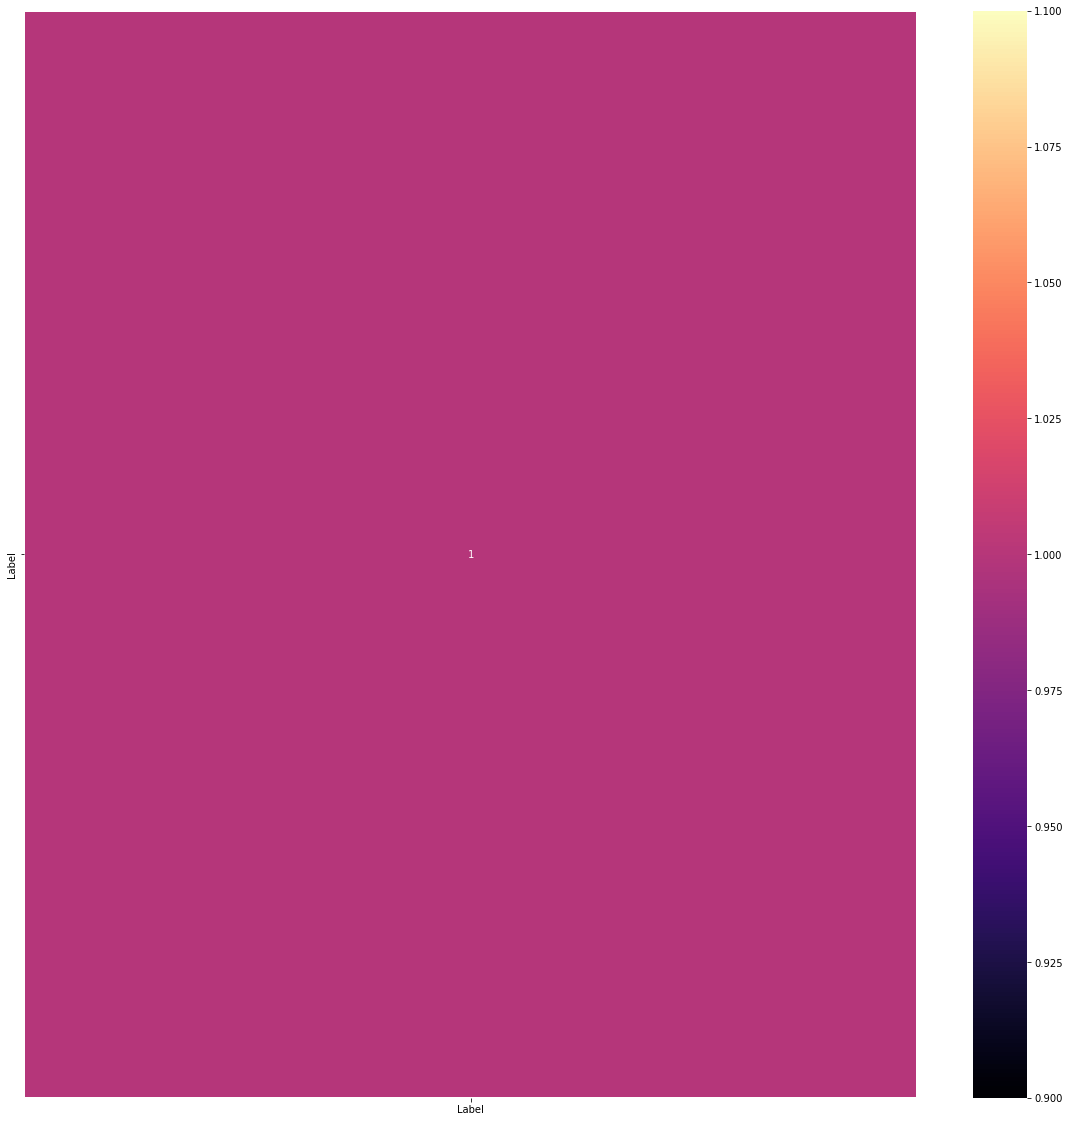

In [707]:
plt.figure(figsize=(20,20))
#sns.heatmap(colTodos[3].corr(),cmap='magma',linecolor='white',linewidths=1)
sns.heatmap(colComum.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

# Acurácia com Dataset com características comuns

In [788]:
'''
Dataset com características comuns
print('------------ DATASET COM CARACTERÍSTICAS COMUNS -----------------------')
print('------------------------NORMALIZADO------------------------------------')
print('KNN ',knn(colComum,norm=True))
print('REGRESSÃO LOGÍSTICA : ',regressaoLogistica(colComum,norm=True))
print('NAIVE BAYES: ',naiveBayes(colComum,norm=True))
print('ÁRVORE DE DECISÃO: ',arvoreDecisao(colComum,norm=True))
print('FLORESTA ALEATÓRIA: ',florestaAleatoria(colComum,norm=True))
print('SVM: ',svm(colComum,norm=True))
print('------------------------NÃO NORMALIZADO------------------------------------\n')
print('KNN: ',knn(colComum,norm=False))
print('REGRESSÃO LOGÍSTICA: ',regressaoLogistica(colComum,norm=False))
print('NAIVE BAYES: ',naiveBayes(colComum,norm=False))
print('ÁRVORE DE DECISÃO: ',arvoreDecisao(colComum,norm=False))
print('FLORESTA ALEATÓRIA: ',florestaAleatoria(colComum,norm=False))
print('SVM: ',svm(colComum,norm=False))
'''#

"\nDataset com características comuns\nprint('------------ DATASET COM CARACTERÍSTICAS COMUNS -----------------------')\nprint('------------------------NORMALIZADO------------------------------------')\nprint('KNN ',knn(colComum,norm=True))\nprint('REGRESSÃO LOGÍSTICA : ',regressaoLogistica(colComum,norm=True))\nprint('NAIVE BAYES: ',naiveBayes(colComum,norm=True))\nprint('ÁRVORE DE DECISÃO: ',arvoreDecisao(colComum,norm=True))\nprint('FLORESTA ALEATÓRIA: ',florestaAleatoria(colComum,norm=True))\nprint('SVM: ',svm(colComum,norm=True))\nprint('------------------------NÃO NORMALIZADO------------------------------------\n')\nprint('KNN: ',knn(colComum,norm=False))\nprint('REGRESSÃO LOGÍSTICA: ',regressaoLogistica(colComum,norm=False))\nprint('NAIVE BAYES: ',naiveBayes(colComum,norm=False))\nprint('ÁRVORE DE DECISÃO: ',arvoreDecisao(colComum,norm=False))\nprint('FLORESTA ALEATÓRIA: ',florestaAleatoria(colComum,norm=False))\nprint('SVM: ',svm(colComum,norm=False))\n"

# RESULTADOS DATASET BENIGNO - ATAQUE TCP - UDP

In [714]:
# 'mac' => Dataet IOT
# 'ataque' => Dataet Ataque
# 'mesclado' => Dataet Mesclado
dfr = dfOriginal('mesclado',25000)

Dataset ATAQUE Selecionado com 50000 amostras


## Resultados acurácia

In [69]:
#a_acuraciaTT = imprimeAcc(normal1=True, normal2=True)

In [76]:
a_acuraciaFF = imprimeAcc(normal1=False, normal2=False)

KNN


Acurácia: Original  99.93333333333332
Amostras: 10000 - Características 80
-------------------------------------------------------
Acuracia: Selecionado Baixa Variancia  99.93333333333332
Amostras: 10000 - Características 64
-------------------------------------------------------


AttributeError: 'tuple' object has no attribute 'drop'

In [ ]:
#colTodos =  restorno os datasets com o teste com todos os seletores
#colComum = retorna o dataset com as colunas em comum com todos os seletoresa
a_colTodos, A_colComum = colDf(norm=True)

In [ ]:
plt.figure(figsize=(20,20))
#sns.heatmap(colTodos[3].corr(),cmap='magma',linecolor='white',linewidths=1)
sns.heatmap(a_colComum.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [ ]:
#Dataset com características comuns
print('------------ DATASET COM CARACTERÍSTICAS COMUNS -----------------------')
print('------------------------NORMALIZADO------------------------------------')
print('KNN ',knn(a_colComum,norm=True))
print('REGRESSÃO LOGÍSTICA : ',regressaoLogistica(a_colComum,norm=True))
print('NAIVE BAYES: ',naiveBayes(a_colComum,norm=True))
print('ÁRVORE DE DECISÃO: ',arvoreDecisao(a_colComum,norm=True))
print('FLORESTA ALEATÓRIA: ',florestaAleatoria(a_colComum,norm=True))
print('SVM: ',svm(a_colComum,norm=True))
print('------------------------NÃO NORMALIZADO------------------------------------\n')
print('KNN: ',knn(a_colComum,norm=False))
print('REGRESSÃO LOGÍSTICA: ',regressaoLogistica(a_colComum,norm=False))
print('NAIVE BAYES: ',naiveBayes(a_colComum,norm=False))
print('ÁRVORE DE DECISÃO: ',arvoreDecisao(a_colComum,norm=False))
print('FLORESTA ALEATÓRIA: ',florestaAleatoria(a_colComum,norm=False))
print('SVM: ',svm(a_colComum,norm=False))

### Gráfico de resultados IoT não IoT - Benigno False-False

<Figure size 1440x720 with 0 Axes>

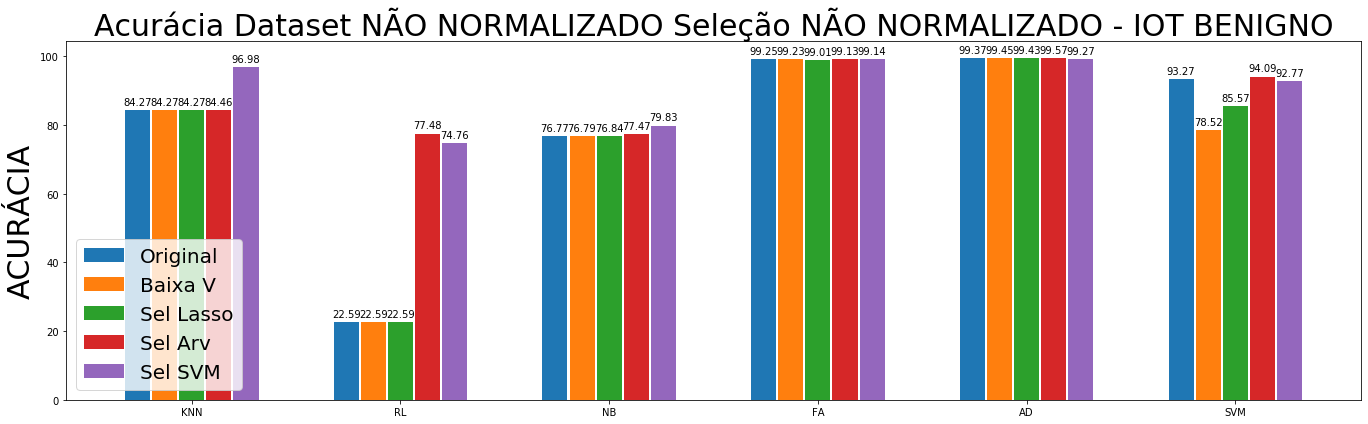

In [750]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

labels = ['KNN', 'RL', 'NB', 'FA', 'AD','SVM']
original = [round(acuraciaFF[0][0],2), round(acuraciaFF[1][0],2), round(acuraciaFF[2][0],2), round(acuraciaFF[3][0],2), round(acuraciaFF[4][0],2),round(acuraciaTT[5][0],2)]
bvariancia = [round(acuraciaFF[0][1],2), round(acuraciaFF[1][1],2), round(acuraciaFF[2][1],2), round(acuraciaFF[3][1],2), round(acuraciaFF[4][1],2),round(acuraciaTT[5][1],2)]
selLasso = [round(acuraciaFF[0][2],2), round(acuraciaFF[1][2],2), round(acuraciaFF[2][2],2), round(acuraciaFF[3][2],2), round(acuraciaFF[4][2],2),round(acuraciaTT[5][2],2)]
selArvo = [round(acuraciaFF[0][3],2), round(acuraciaFF[1][3],2), round(acuraciaFF[2][3],2), round(acuraciaFF[3][3],2), round(acuraciaFF[4][3],2),round(acuraciaTT[5][3],2)]
selSVm = [round(acuraciaFF[0][4],2), round(acuraciaFF[1][4],2), round(acuraciaFF[2][4],2), round(acuraciaFF[3][4],2), round(acuraciaFF[4][4],2),round(acuraciaTT[5][4],2)]

x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 6))
rects1 = ax.bar(x+width-0.38, original, width, label='Original')
rects2 = ax.bar(x+width-0.25, bvariancia, width, label='Baixa V')
rects3 = ax.bar(x+width-0.12, selLasso, width, label='Sel Lasso')
rects4 = ax.bar(x+width+0.01, selArvo, width, label='Sel Arv')
rects5 = ax.bar(x+width+0.14, selSVm, width, label='Sel SVM')
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ACURÁCIA',fontsize=30)
ax.set_title('Acurácia Dataset NÃO NORMALIZADO Seleção NÃO NORMALIZADO - IOT BENIGNO',fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3,fontsize=20)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
#autolabel(rects6)

fig.tight_layout()

plt.show()

### Gráfico de resultados IoT não IoT - Benigno True-True

<Figure size 1440x720 with 0 Axes>

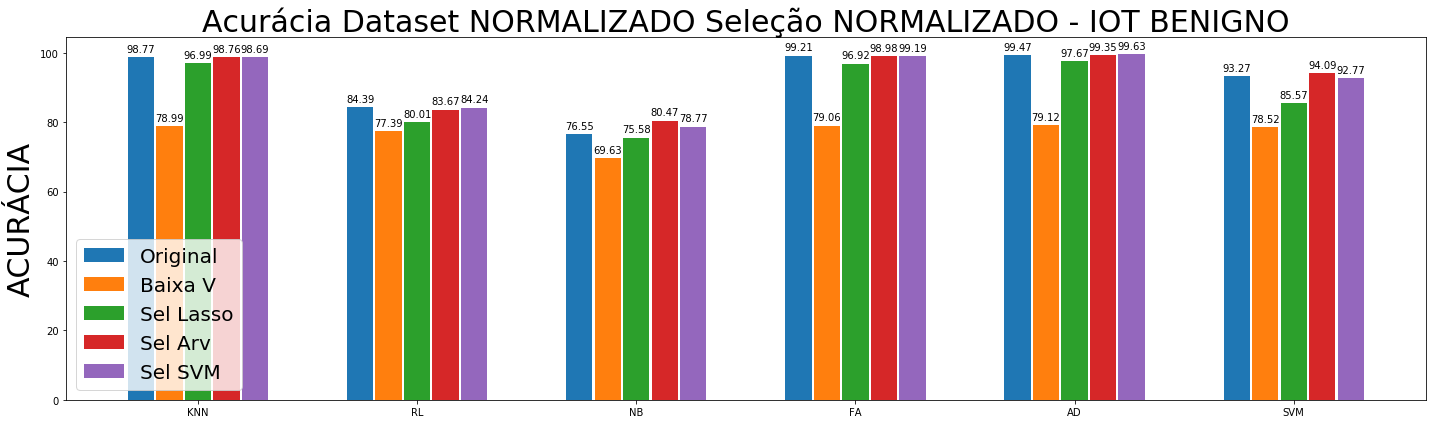

In [751]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

labels = ['KNN', 'RL', 'NB', 'FA', 'AD','SVM']
original = [round(acuraciaTT[0][0],2), round(acuraciaTT[1][0],2), round(acuraciaTT[2][0],2), round(acuraciaTT[3][0],2), round(acuraciaTT[4][0],2),round(acuraciaTT[5][0],2)]
bvariancia = [round(acuraciaTT[0][1],2), round(acuraciaTT[1][1],2), round(acuraciaTT[2][1],2), round(acuraciaTT[3][1],2), round(acuraciaTT[4][1],2),round(acuraciaTT[5][1],2)]
selLasso = [round(acuraciaTT[0][2],2), round(acuraciaTT[1][2],2), round(acuraciaTT[2][2],2), round(acuraciaTT[3][2],2), round(acuraciaTT[4][2],2),round(acuraciaTT[5][2],2)]
selArvo = [round(acuraciaTT[0][3],2), round(acuraciaTT[1][3],2), round(acuraciaTT[2][3],2), round(acuraciaTT[3][3],2), round(acuraciaTT[4][3],2),round(acuraciaTT[5][3],2)]
selSVm = [round(acuraciaTT[0][4],2), round(acuraciaTT[1][4],2), round(acuraciaTT[2][4],2), round(acuraciaTT[3][4],2), round(acuraciaTT[4][4],2),round(acuraciaTT[5][4],2)]

x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 6))
rects1 = ax.bar(x+width-0.38, original, width, label='Original')
rects2 = ax.bar(x+width-0.25, bvariancia, width, label='Baixa V')
rects3 = ax.bar(x+width-0.12, selLasso, width, label='Sel Lasso')
rects4 = ax.bar(x+width+0.01, selArvo, width, label='Sel Arv')
rects5 = ax.bar(x+width+0.14, selSVm, width, label='Sel SVM')
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ACURÁCIA',fontsize=30)
ax.set_title('Acurácia Dataset NORMALIZADO Seleção NORMALIZADO - IOT BENIGNO',fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3,fontsize=20)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
#autolabel(rects6)

fig.tight_layout()

plt.show()

### Gráfico de resultados ATAQUE - Benigno FALSE-FALSE

<Figure size 1440x720 with 0 Axes>

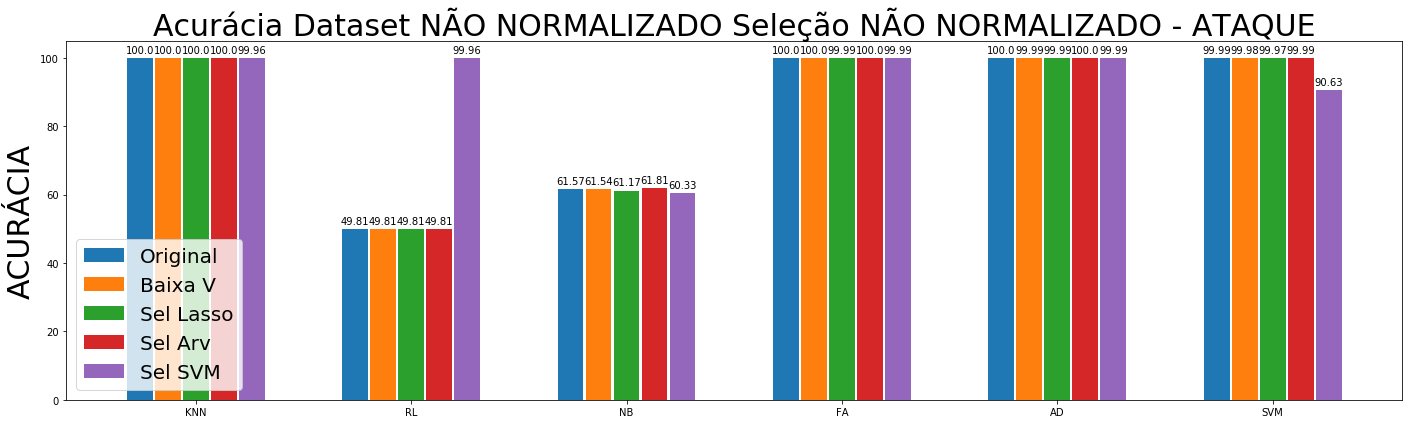

In [752]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

labels = ['KNN', 'RL', 'NB', 'FA', 'AD','SVM']
original = [round(a_acuraciaFF[0][0],2), round(a_acuraciaFF[1][0],2), round(a_acuraciaFF[2][0],2), round(a_acuraciaFF[3][0],2), round(a_acuraciaFF[4][0],2),round(a_acuraciaFF[5][0],2)]
bvariancia = [round(a_acuraciaFF[0][1],2), round(a_acuraciaFF[1][1],2), round(a_acuraciaFF[2][1],2), round(a_acuraciaFF[3][1],2), round(a_acuraciaFF[4][1],2),round(a_acuraciaFF[5][1],2)]
selLasso = [round(a_acuraciaFF[0][2],2), round(a_acuraciaFF[1][2],2), round(a_acuraciaFF[2][2],2), round(a_acuraciaFF[3][2],2), round(a_acuraciaFF[4][2],2),round(a_acuraciaFF[5][2],2)]
selArvo = [round(a_acuraciaFF[0][3],2), round(a_acuraciaFF[1][3],2), round(a_acuraciaFF[2][3],2), round(a_acuraciaFF[3][3],2), round(a_acuraciaFF[4][3],2),round(a_acuraciaFF[5][3],2)]
selSVm = [round(a_acuraciaFF[0][4],2), round(a_acuraciaFF[1][4],2), round(a_acuraciaFF[2][4],2), round(a_acuraciaFF[3][4],2), round(a_acuraciaFF[4][4],2),round(a_acuraciaFF[5][4],2)]

x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 6))
rects1 = ax.bar(x+width-0.38, original, width, label='Original')
rects2 = ax.bar(x+width-0.25, bvariancia, width, label='Baixa V')
rects3 = ax.bar(x+width-0.12, selLasso, width, label='Sel Lasso')
rects4 = ax.bar(x+width+0.01, selArvo, width, label='Sel Arv')
rects5 = ax.bar(x+width+0.14, selSVm, width, label='Sel SVM')
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ACURÁCIA',fontsize=30)
ax.set_title('Acurácia Dataset NÃO NORMALIZADO Seleção NÃO NORMALIZADO - ATAQUE',fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3,fontsize=20)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
#autolabel(rects6)

fig.tight_layout()

plt.show()

### Gráfico de resultados ATAQUE - Benigno True-True

<Figure size 1440x720 with 0 Axes>

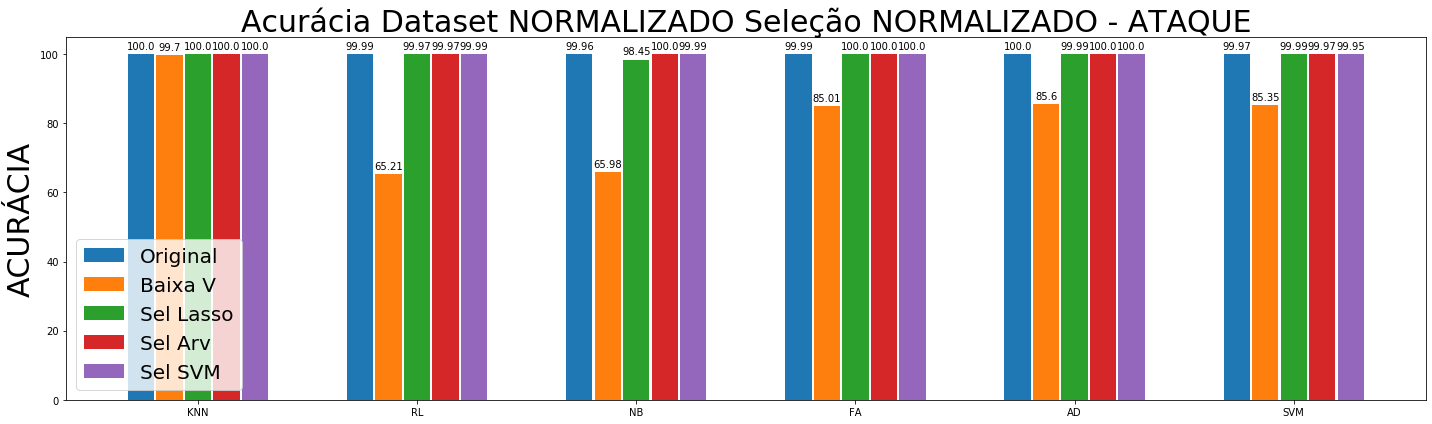

In [740]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,10))

labels = ['KNN', 'RL', 'NB', 'FA', 'AD','SVM']
original = [round(a_acuraciaTT[0][0],2), round(a_acuraciaTT[1][0],2), round(a_acuraciaTT[2][0],2), round(a_acuraciaTT[3][0],2), round(a_acuraciaTT[4][0],2),round(a_acuraciaTT[5][0],2)]
bvariancia = [round(a_acuraciaTT[0][1],2), round(a_acuraciaTT[1][1],2), round(a_acuraciaTT[2][1],2), round(a_acuraciaTT[3][1],2), round(a_acuraciaTT[4][1],2),round(a_acuraciaTT[5][1],2)]
selLasso = [round(a_acuraciaTT[0][2],2), round(a_acuraciaTT[1][2],2), round(a_acuraciaTT[2][2],2), round(a_acuraciaTT[3][2],2), round(a_acuraciaTT[4][2],2),round(a_acuraciaTT[5][2],2)]
selArvo = [round(a_acuraciaTT[0][3],2), round(a_acuraciaTT[1][3],2), round(a_acuraciaTT[2][3],2), round(a_acuraciaTT[3][3],2), round(a_acuraciaTT[4][3],2),round(a_acuraciaTT[5][3],2)]
selSVm = [round(a_acuraciaTT[0][4],2), round(a_acuraciaTT[1][4],2), round(a_acuraciaTT[2][4],2), round(a_acuraciaTT[3][4],2), round(a_acuraciaTT[4][4],2),round(a_acuraciaTT[5][4],2)]

x = np.arange(len(labels))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 6))
rects1 = ax.bar(x+width-0.38, original, width, label='Original')
rects2 = ax.bar(x+width-0.25, bvariancia, width, label='Baixa V')
rects3 = ax.bar(x+width-0.12, selLasso, width, label='Sel Lasso')
rects4 = ax.bar(x+width+0.01, selArvo, width, label='Sel Arv')
rects5 = ax.bar(x+width+0.14, selSVm, width, label='Sel SVM')
#rects6 = ax.bar(x+width+0.27, selSVm, width, label='test')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ACURÁCIA',fontsize=30)
ax.set_title('Acurácia Dataset NORMALIZADO Seleção NORMALIZADO - ATAQUE',fontsize=30)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=3,fontsize=20)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize=10)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
#autolabel(rects6)

fig.tight_layout()

plt.show()

## DATASET MÁXIMA RELEVÂNCIA E MÍNIMA REDUNDÂNCIA


In [753]:
DfRanqueado = ['Src Port', 'Idle Min', 'RST Flag Count', 'Flow Duration', 'Average Packet Size', 'Fwd Seg Size Min', 'Subflow Fwd Packets',
 'Flow IAT Std', 'Flow Bytes/s', 'Dst Port', 'Bwd Packets/s', 'Fwd Packets/s', 'FWD Init Win Bytes', 'Fwd PSH Flags', 'Bwd Segment Size Avg',
 'Bwd Init Win Bytes', 'Flow IAT Mean', 'Bwd Packet Length Min', 'Bwd Packet/Bulk Avg', 'Fwd Packet Length Max', 'FIN Flag Count',
 'Idle Mean', 'PSH Flag Count', 'Bwd Bulk Rate Avg', 'Idle Std', 'Flow Packets/s', 'Flow IAT Max', 'Fwd Packet Length Mean',
 'Bwd IAT Total', 'Bwd Packet Length Mean', 'Protocol', 'Fwd IAT Total', 'Fwd IAT Mean', 'SYN Flag Count', 'Idle Max', 'Subflow Fwd Bytes',
 'Bwd IAT Std', 'Subflow Bwd Bytes', 'Bwd IAT Min', 'Total Length of Fwd Packet']

In [784]:
dfMRMR = dfMac[DfRanqueado][:50000]

In [785]:
dfMRMR['Label'] = dfMac['Label'][:50000]

In [787]:
#Dataset COM MÁXIMA RELEVÂNCIA E MÍNIMA REDUNDÂNCIA

print('---------- DATASET 40 características MÁXIMA RELEVÂNCIA E MÍNIMA REDUNDÂNCIA----------------')
print('------------------------NORMALIZADO------------------------------------')
print('KNN ',knn(dfMRMR,norm=True))
print('REGRESSÃO LOGÍSTICA : ',regressaoLogistica(dfMRMR,norm=True))
print('NAIVE BAYES: ',naiveBayes(dfMRMR,norm=True))
print('ÁRVORE DE DECISÃO: ',arvoreDecisao(dfMRMR,norm=True))
print('FLORESTA ALEATÓRIA: ',florestaAleatoria(dfMRMR,norm=True))
print('SVM: ',svm(dfMRMR,norm=True))
print('------------------------NÃO NORMALIZADO------------------------------------\n')
print('KNN: ',knn(dfMRMR,norm=False))
print('REGRESSÃO LOGÍSTICA: ',regressaoLogistica(dfMRMR,norm=False))
print('NAIVE BAYES: ',naiveBayes(dfMRMR,norm=False))
print('ÁRVORE DE DECISÃO: ',arvoreDecisao(dfMRMR,norm=False))
print('FLORESTA ALEATÓRIA: ',florestaAleatoria(dfMRMR,norm=False))
print('SVM: ',svm(dfMRMR,norm=False))

---------- DATASET 40 características MÁXIMA RELEVÂNCIA E MÍNIMA REDUNDÂNCIA----------------
------------------------NORMALIZADO------------------------------------
KNN  98.61999999999999
REGRESSÃO LOGÍSTICA :  84.2060606060606
NAIVE BAYES:  77.60000000000001
ÁRVORE DE DECISÃO:  99.23333333333333
FLORESTA ALEATÓRIA:  99.46666666666667
SVM:  92.89333333333335
------------------------NÃO NORMALIZADO------------------------------------

KNN:  84.05333333333334
REGRESSÃO LOGÍSTICA:  22.587878787878786
NAIVE BAYES:  77.47333333333334
ÁRVORE DE DECISÃO:  99.27333333333334
FLORESTA ALEATÓRIA:  99.42
SVM:  78.12666666666667


In [61]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
X = [[ 0.87, -1.34,  0.31 ],[-2.79, -0.02, -0.85 ],[-1.34, -0.48, -2.55 ],[ 1.92,  1.48,  0.65 ]]
y = [0, 1, 0, 1]
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)

In [62]:
selector.estimator_.coef_

array([[-0.3252302 ,  0.83462377,  0.49750423]])

In [63]:
selector.threshold_

0.5524527319086916

In [64]:
selector.get_support()

array([False,  True, False])

In [65]:
selector.transform(X)

array([[-1.34],
       [-0.02],
       [-0.48],
       [ 1.48]])

In [73]:
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)
# Feature Extraction with PCA
import numpy
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
#print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.88854663 0.06159078 0.02579012]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]
[[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]


In [84]:
import numpy as np
from sklearn.decomposition import IncrementalPCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
ipca = IncrementalPCA(n_components=2, batch_size=3)
ipca.fit(X)
IncrementalPCA(batch_size=3, n_components=2)
ipca.transform(X) # doctest: +SKIP
#ipca.get_params(deep = True )
ipca.components_
#ipca.inverse_transform(z)

array([[ 0.83849224,  0.54491354],
       [-0.54491354,  0.83849224]])